# Групповой проект №1. Первичный анализ данных "Международные авиаперевозки в США"

<img src="https://image.shutterstock.com/z/stock-vector-set-of-vector-tags-with-usa-airport-codes-vector-illustration-for-travelers-famous-american-451061281.jpg" height="400" />

Данные взяты из [отчета по статистике международных авиапассажирских и грузовых перевозок США](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report#TheReports).

Этот же датасет, но в гугл драйв: https://drive.google.com/drive/folders/1P3i89WzfkVmC2L53G9qQxjzWJ3NSanat?usp=sharing

В ноутбуке скачивание данных происходит по ссылке с гугл-драйв, просьба не изменять.


Доступен следующий набор данных:

- **International_Report_Passengers.csv**: данные об общем количестве пассажиров за каждый месяц и год между парой аэропортов, обслуживаемых конкретной авиакомпанией.
Данные о пассажирах и грузоперевозках в США являются конфиденциальными в первые 6 месяцев, после чего они могут быть опубликованы. Количество пассажиров записывается в трех столбцах: «По расписанию», «Чартер» и «Всего»: "Scheduled", "Charter", "Total".

Описание атрибутов доступно по ссылке: https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw


## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии.  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1eydwcHaGKznePEbFuRT810cEGLgB3YYqpy-cDeRx_ik/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

**Вопросы, на которые нужно ответить в презентации перечислены в ноутбуке.**

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите Екатерине (@poka_katt). 

## Требования к оформлению графиков (в ноутбуке и в презентации)

1. Каждый график необходимо подписывать
2. Оси Х и У всегда подписаны
3. Выбрана подходящая шкала и шаг 
4. Не забывайте про логарифмическую шкалу и всегда используйте при необходимости!


# Итак, приступим

Импортируем необходимые библиотеки

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Загрузим International_Report_Passengers.csv

In [ ]:
url='https://drive.google.com/file/d/1nvi3GFkmZDXSbLrTe_ZmyNAjZGQ74A4D/view?usp=sharing'

url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url2, delimiter=',')
df1.dataframeName = 'International_Report_Passengers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 693122 rows and 16 columns


## Посмотрим на наш датасет

In [ ]:
df1

data_dte  Year  Month  ...  Scheduled Charter  Total
0       07/01/2004  2004      7  ...      19265       0  19265
1       11/01/2008  2008     11  ...       3099       0   3099
2       10/01/2002  2002     10  ...         33       0     33
3       03/01/2007  2007      3  ...       3815       0   3815
4       03/01/2009  2009      3  ...      17993       0  17993
...            ...   ...    ...  ...        ...     ...    ...
693117  03/01/2021  2021      3  ...          0      16     16
693118  03/01/2021  2021      3  ...          0       9      9
693119  03/01/2021  2021      3  ...          0      19     19
693120  03/01/2021  2021      3  ...          0      77     77
693121  03/01/2021  2021      3  ...          0       8      8

[693122 rows x 16 columns]

## Отсортируем данные по дате

In [ ]:
df1.sort_values(by=['Year','Month'], inplace=True)
#Аргумент «inplace = True» означает, что фрейм данных должен сделать изменения постоянными,
#То есть сохранит изменения в загруженной таблице (у нас это df1)

In [ ]:
df1

data_dte  Year  Month  ...  Scheduled Charter  Total
294485  01/01/1990  1990      1  ...          0     796    796
294617  01/01/1990  1990      1  ...       1790       0   1790
294655  01/01/1990  1990      1  ...       1515       0   1515
294671  01/01/1990  1990      1  ...       2370       0   2370
294762  01/01/1990  1990      1  ...       6489       0   6489
...            ...   ...    ...  ...        ...     ...    ...
693117  03/01/2021  2021      3  ...          0      16     16
693118  03/01/2021  2021      3  ...          0       9      9
693119  03/01/2021  2021      3  ...          0      19     19
693120  03/01/2021  2021      3  ...          0      77     77
693121  03/01/2021  2021      3  ...          0       8      8

[693122 rows x 16 columns]

# Посмотрим на кол-во записей в таблице для 2010-2020 годов

In [ ]:
# 1ый способ:
n_flights = df1.loc[df1['Year']==2010]
print(len(n_flights))

23551


In [ ]:
# 2ой способ
n_flights = df1.query('Year==2010')
print(len(n_flights))

23551


 Согласитесь второй способ (с использованием "query") удобнее и красивее?

In [ ]:
# можно писать несколько условий
df1.query("Year==2020 & Month==3 & carrier=='RV'").head(3)

data_dte  Year  Month  ...  Scheduled Charter  Total
671596  03/01/2020  2020      3  ...       4280       0   4280
671601  03/01/2020  2020      3  ...      40105       0  40105
671611  03/01/2020  2020      3  ...      29844       0  29844

[3 rows x 16 columns]

In [ ]:
years_to_check = np.arange(2010, 2022)

for year in years_to_check:
    n_flights = df1.query('Year=='+str(year))
    print(f"Для {year} года в таблице {len(n_flights)} записей.") #Как видите, в методе print() для вывода использован f-string.
                                                                    #Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

Для 2010 года в таблице 23551 записей.
Для 2011 года в таблице 24516 записей.
Для 2012 года в таблице 24070 записей.
Для 2013 года в таблице 24464 записей.
Для 2014 года в таблице 25843 записей.
Для 2015 года в таблице 27234 записей.
Для 2016 года в таблице 28645 записей.
Для 2017 года в таблице 29998 записей.
Для 2018 года в таблице 30667 записей.
Для 2019 года в таблице 30436 записей.
Для 2020 года в таблице 15868 записей.
Для 2021 года в таблице 4183 записей.


В методе print() для вывода использован f-string. Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

In [ ]:
# Проверим пропуски
df1.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

# Задание 1. Пассажирский трафик
Вопрос 1: Постройте график изменения кол-ва перевезенных людей (столбец Total) за январь-декабрь 2019 года и за январь-декабрь 2020. Можно построить в два графика или отразить 2 кривые на одном (второй вариант предпочтительнее, но тогда не забудьте изменить цвет у кривых). Какой вывод можно сделать исходя из графиков?

Ответ:


In [ ]:
df1920 = df1.loc[(df1['Year'] == 2019) | (df1['Year'] == 2020)].copy() # сделаем сабсет по 19-20 годам
total_pass = df1920.groupby(['Year','Month'])['Total'].sum().to_frame() #  сгруппируем по годам и месяцам, просуммировав значения столбца тотал для индексов 2-го уровня.
total_pass.reset_index(inplace=True) # сброс индекса, т.к. seaborn не хочет кушать мультииндекс

In [ ]:
months = ['Январь','Февраль','Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'] # список меток для шкалы X

In [ ]:
import matplotlib.ticker as ticker # этой штукой удобно форматировать большие числа шкалы Y

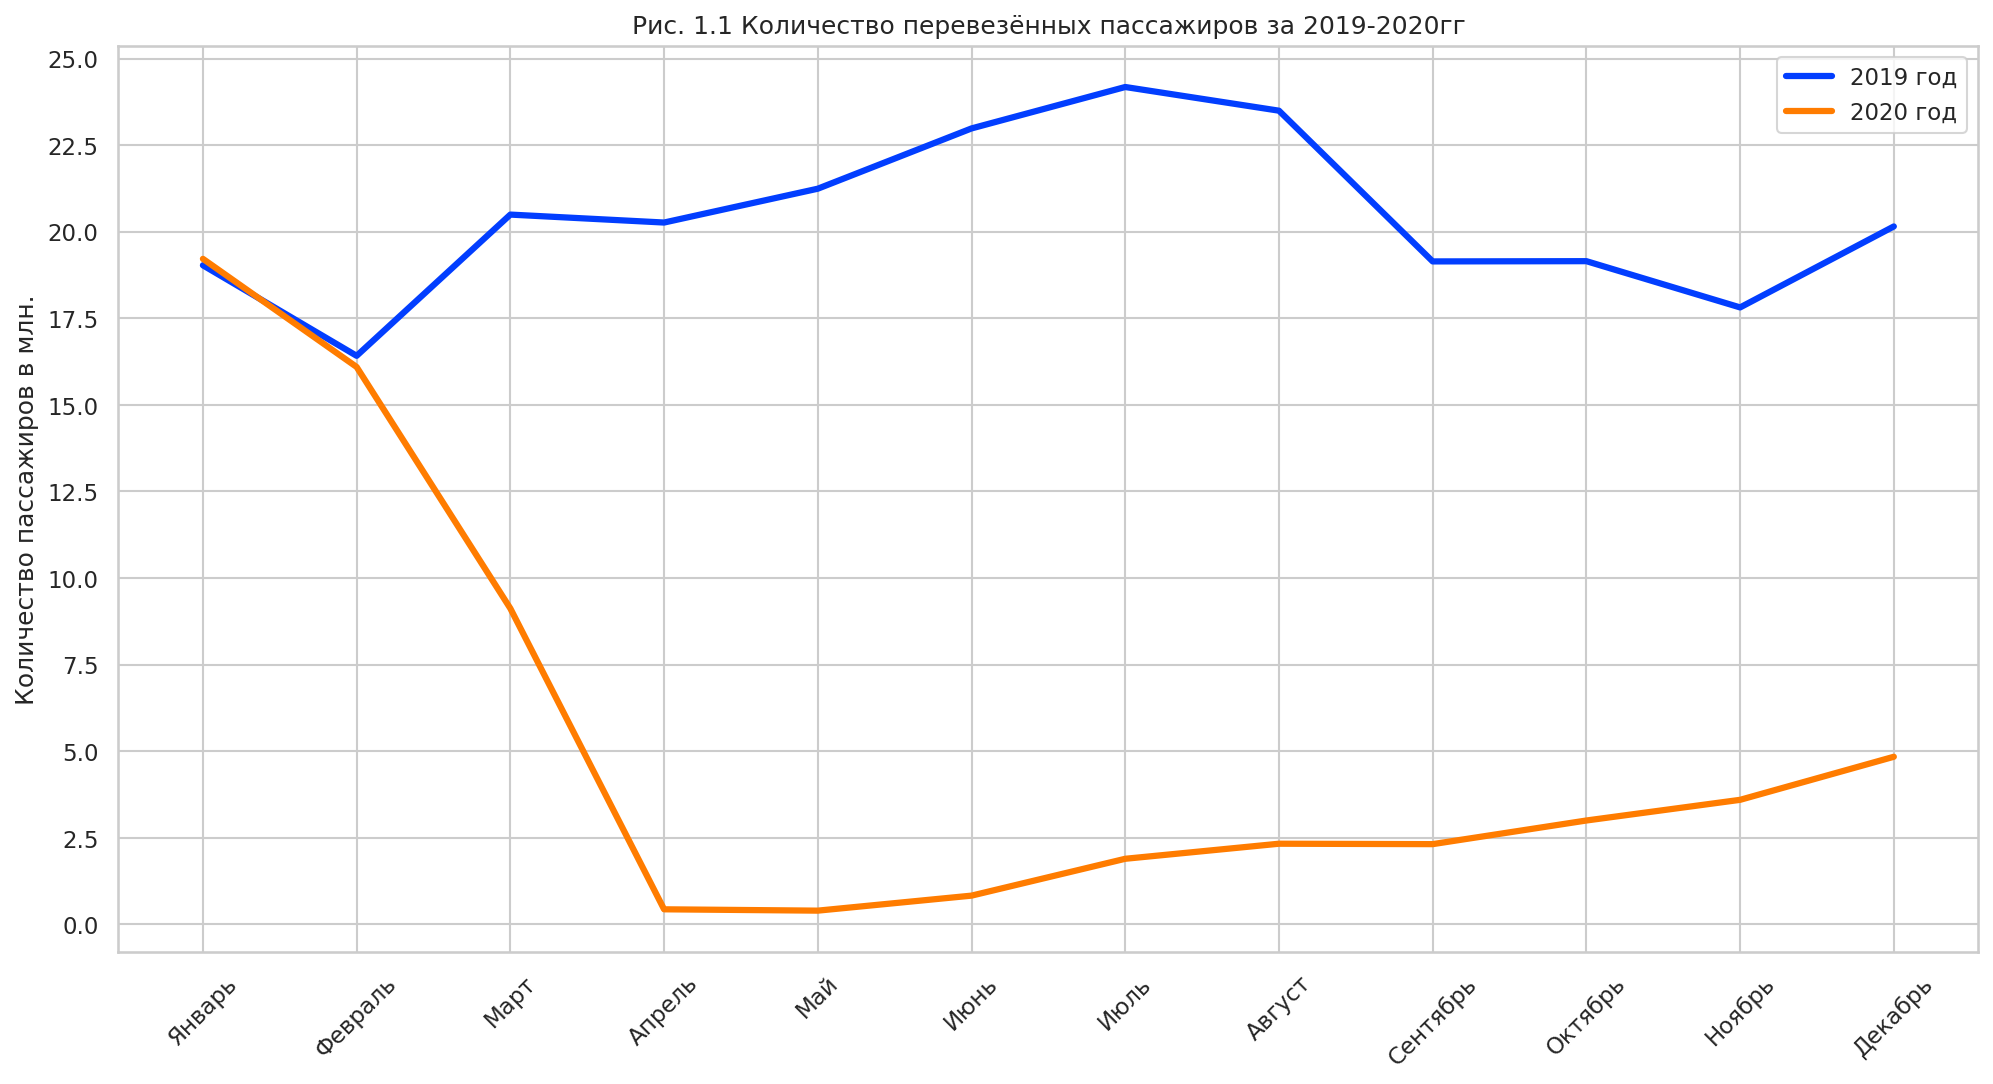

In [ ]:
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')
graph = sns.lineplot(data=total_pass, x='Month', y='Total', hue='Year', palette='bright', linewidth=3,)
plt.xticks(range(1,13), months, rotation=45) #  зададим количество тиков явно, подкинем список месяцев, крутанём лейблы для красоты
plt.xlabel('') #  дадим название оси X
plt.ylabel('Количество пассажиров в млн.') #  дадим название оси Y
plt.legend(['2019 год', '2020 год']) #  переделаем автоматическую легенду
graph.yaxis.set_major_locator(plt.MaxNLocator(12)) #  зададим максимальное число тиков для оси Y
graph.set_yticklabels(['{:,.1f}'.format(y) for y in graph.get_yticks()/1000000]) #  применим мини-функцию форматирования лейблов из научной нотации в человеческую
graph.set(title='Рис. 1.1 Количество перевезённых пассажиров за 2019-2020гг')
plt.show()

Вопрос 2: как изменился (в процентах) трафик между США и другими странами в период с января по декабрь 2020 года по сравнению с январем-декабрем 2019 года? (трафик=кол-во перевезенных за месяц людей). Изобразите в виде графика: по оси Х - месяц+год, по оси У - изменение трафика в процентах.

Ответ:

In [ ]:
total_pass.loc[(total_pass['Year']==2019),['%']] = 100 # каждый месяц 2019 это 100%
total_pass.loc[(total_pass['Year']==2020),['%']] = [i/j * 100 for i,j in zip(total_pass.loc[(total_pass['Year']==2020)]['Total'], total_pass.loc[(total_pass['Year']==2019)]['Total'])] # считаем процент в 2020
total_pass

Year  Month     Total           %
0   2019      1  19030423  100.000000
1   2019      2  16416783  100.000000
2   2019      3  20494153  100.000000
3   2019      4  20264599  100.000000
4   2019      5  21241483  100.000000
5   2019      6  22981519  100.000000
6   2019      7  24177588  100.000000
7   2019      8  23494045  100.000000
8   2019      9  19142066  100.000000
9   2019     10  19149303  100.000000
10  2019     11  17813849  100.000000
11  2019     12  20151854  100.000000
12  2020      1  19216351  100.977004
13  2020      2  16094637   98.037703
14  2020      3   9122239   44.511422
15  2020      4    436515    2.154077
16  2020      5    397858    1.873024
17  2020      6    831348    3.617463
18  2020      7   1895181    7.838586
19  2020      8   2329957    9.917224
20  2020      9   2317994   12.109424
21  2020     10   3000621   15.669609
22  2020     11   3597415   20.194485
23  2020     12   4840440   24.019825

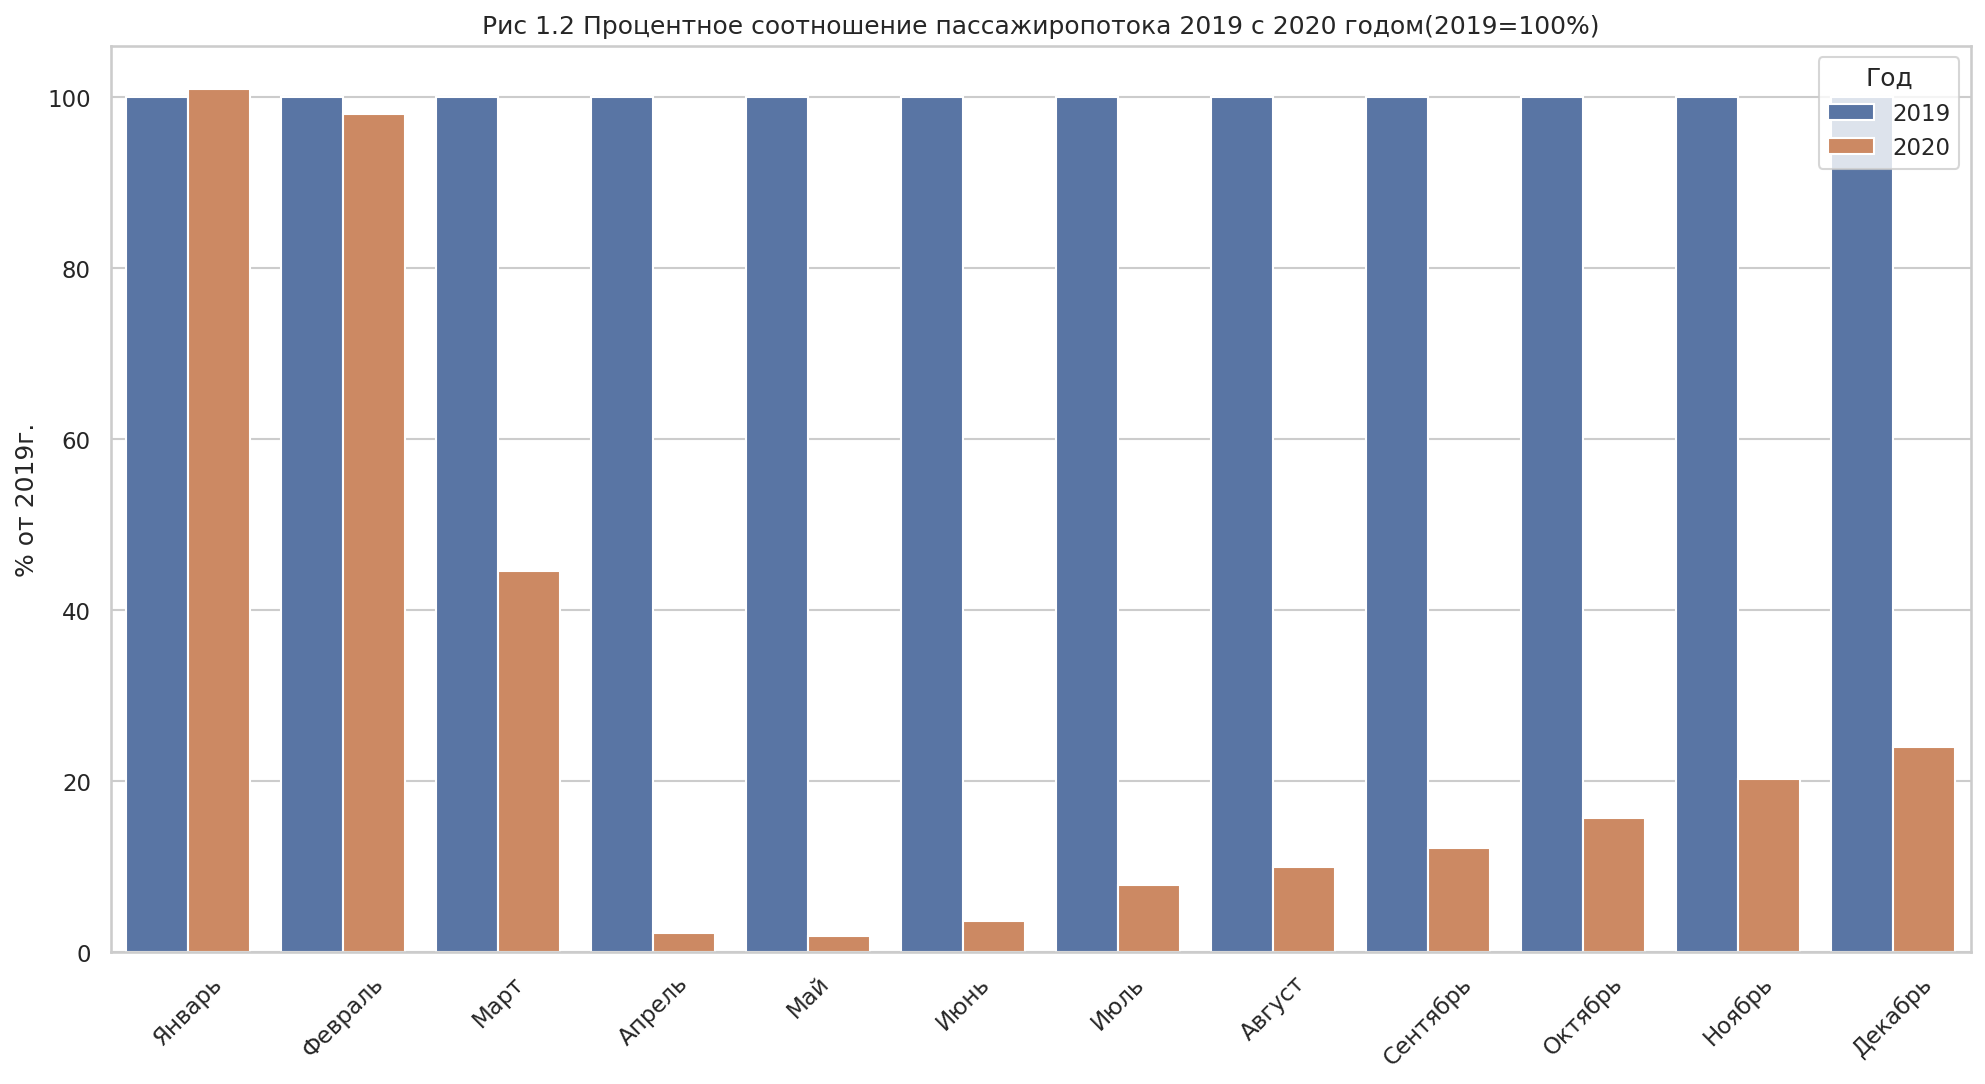

In [ ]:
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')
sns.barplot(data=total_pass, x='Month', y='%', hue='Year') # сначала столбики.
plt.xlabel('') #  дадим название оси X
plt.xticks(range(0,12), months, rotation=45) #  зададим количество тиков явно, подкинем список месяцев, крутанём лейблы для красоты
plt.ylabel('% от 2019г.') #  дадим название оси Y
plt.legend(title='Год') #  переделаем автоматическую легенду
plt.title('Рис 1.2 Процентное соотношение пассажиропотока 2019 с 2020 годом(2019=100%)')
plt.show()

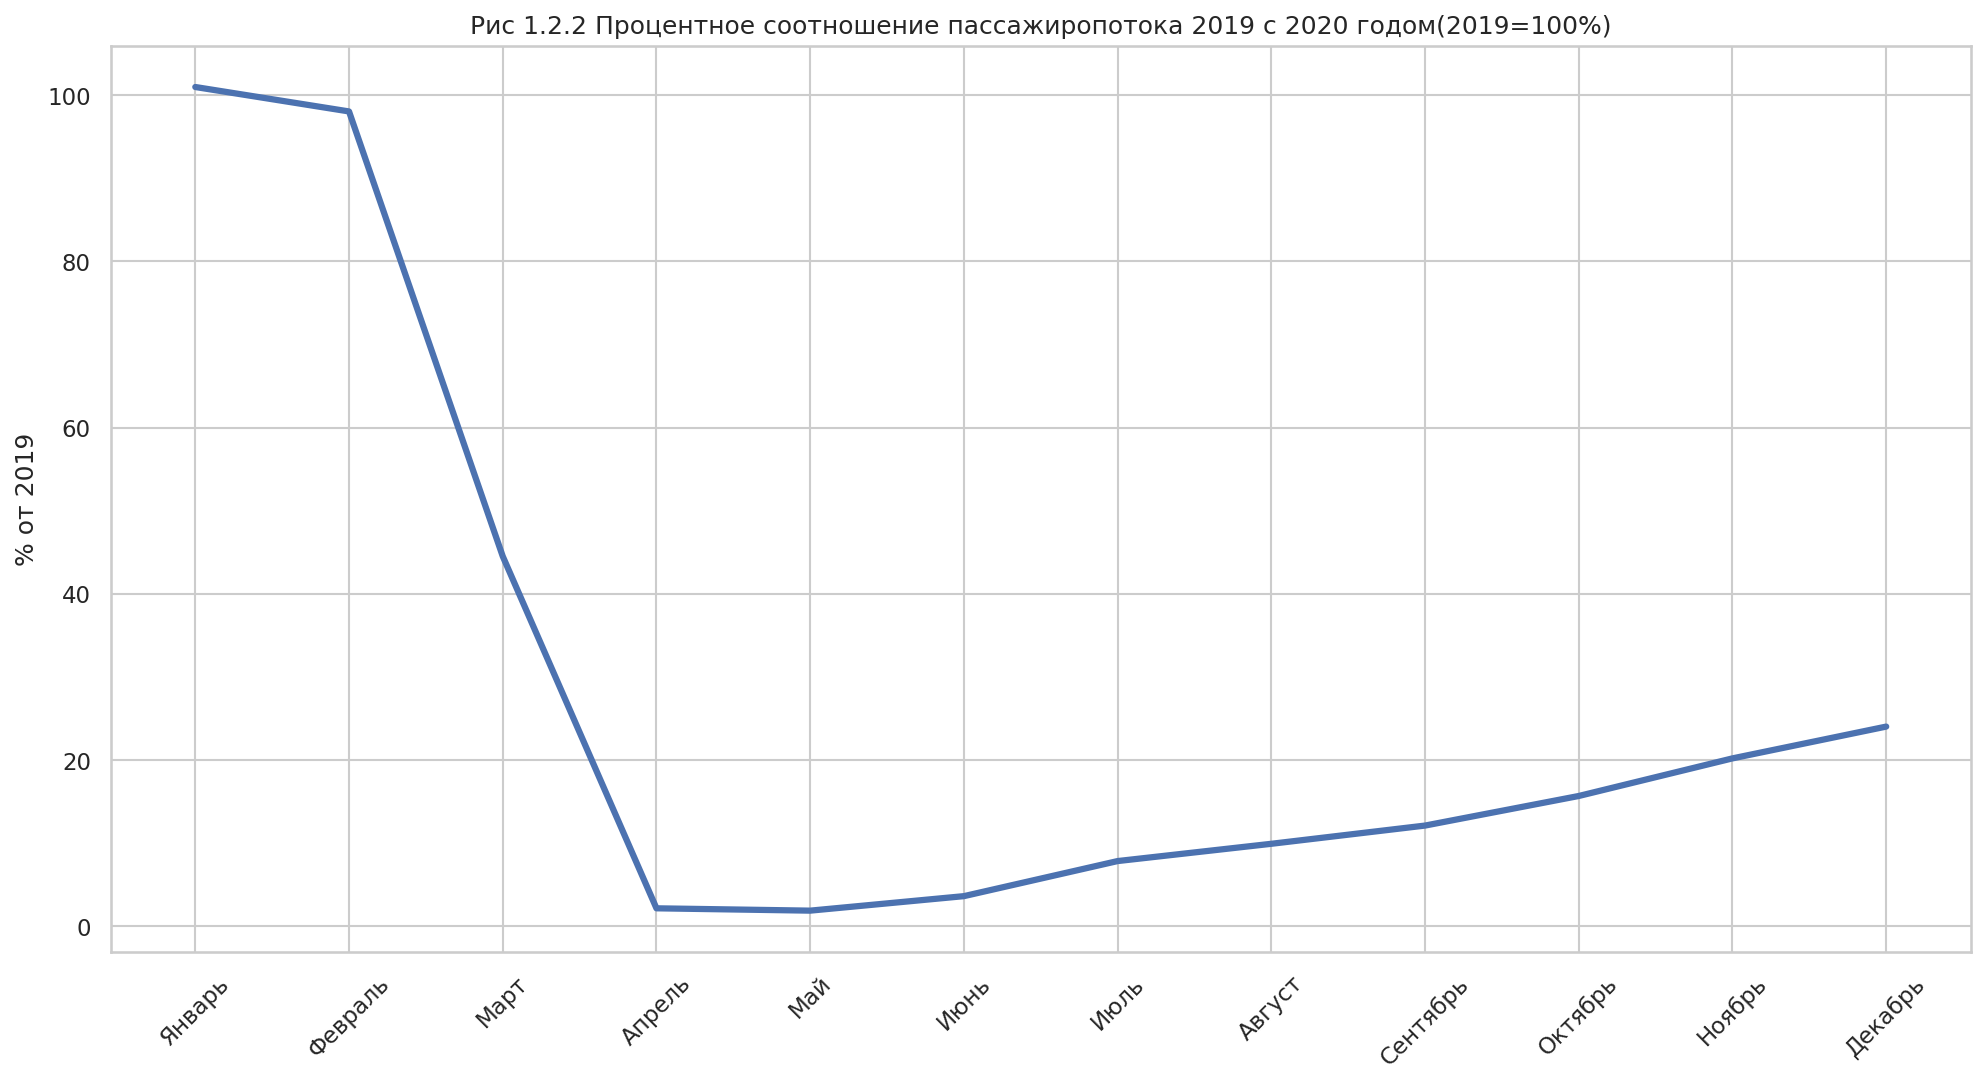

In [ ]:
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')
sns.lineplot(data=total_pass.loc[total_pass['Year']==2020], x='Month', y='%', linewidth=3) #  теперь линейный график.
plt.xlabel('') #  дадим название оси X
plt.xticks(range(1,13), months, rotation=45) #  зададим количество тиков явно, подкинем список месяцев, крутанём лейблы для красоты
plt.ylabel('% от 2019') #  дадим название оси Y
plt.title('Рис 1.2.2 Процентное соотношение пассажиропотока 2019 с 2020 годом(2019=100%)')
plt.show()

# Задание 2. Загруженность авиакомпаний

Вопрос 1: Нарисуйте топ 5 популярных авиакомпаний (airlineid, carrier) за все года (1990-2021). По оси Х на графике укажите название авикомпании (БЕЗ кода), по оси У - кол-во перевезенных людей за все года.

Ответ:

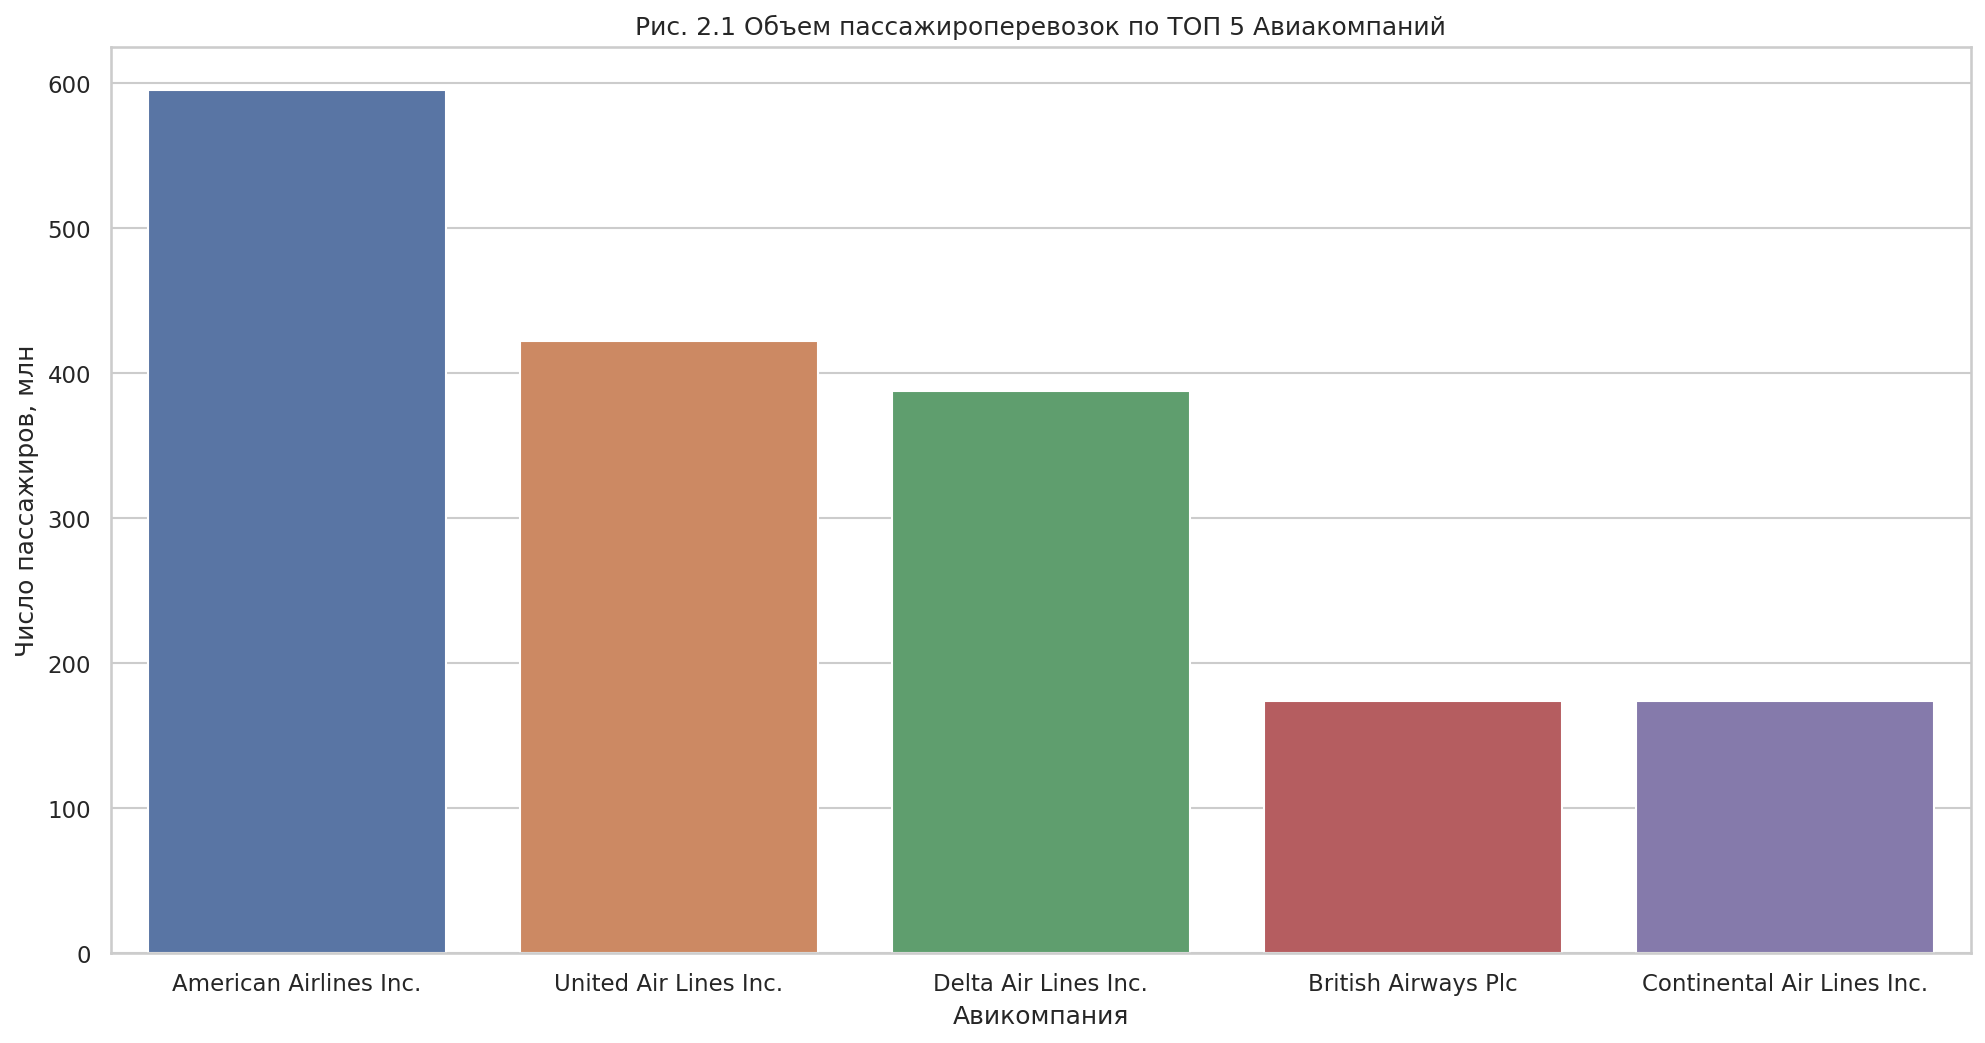

In [ ]:
#Загрузим данные по кодам Авиакомпаний

airlines_url = 'https://raw.githubusercontent.com/beanumber/airlines/master/data-raw/airlines.csv'
airlines = pd.read_csv(airlines_url)
airlines = airlines.rename(columns={"Code": "carrier","Description": "AirCraft",})
airlines.set_index('carrier')

#Новый Датасет с наименованием Авиакомпании

df2 = df1.merge(airlines)[['carrier', 'AirCraft', 'Year', 'Total']]

#Выберем ТОП5 авиакомпаний по объему перевозок за весь период

top5_aircraft_codes = df2[['carrier', 'Total']].groupby(['carrier']).sum() \
.sort_values(by="Total", ascending=False) \
.head(5) \
.drop('Total', axis=1) \
.reset_index()['carrier']

#Выберем по выбранным ТОП5 компаний отдельный Датасет для отрисовки

df2 = df2[df2['carrier'].isin(top5_aircraft_codes)]
df2_1 = df2.drop('carrier', axis=1) 
df2_1 = df2_1[['AirCraft', 'Total']].groupby(['AirCraft']) \
.sum().reset_index().sort_values(by="Total", ascending=False)
df2_1

#Непосредственно отрисовка графика пассажирапотока по ТОП5 Авиакомпаний

f, ax = plt.subplots(figsize=(16, 8), dpi=150)
g = sns.barplot(x="AirCraft", y="Total", data=df2_1)

ylabels = ['{:.0f}'.format(x) for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
g.set(title='Рис. 2.1 Объем пассажироперевозок по ТОП 5 Авиакомпаний')
ax.set(ylabel="Число пассажиров, млн",
       xlabel="Авикомпания")
sns.set_style("darkgrid", { 'grid.color': ".6", 
                            'grid.linestyle': "-"})

Вопрос 2: Какая авиакомпания самая "быстрорастущая", если оценивать рост по кол-ву перевезенных людей? Какая компания теряет клиентов?

Ответ:

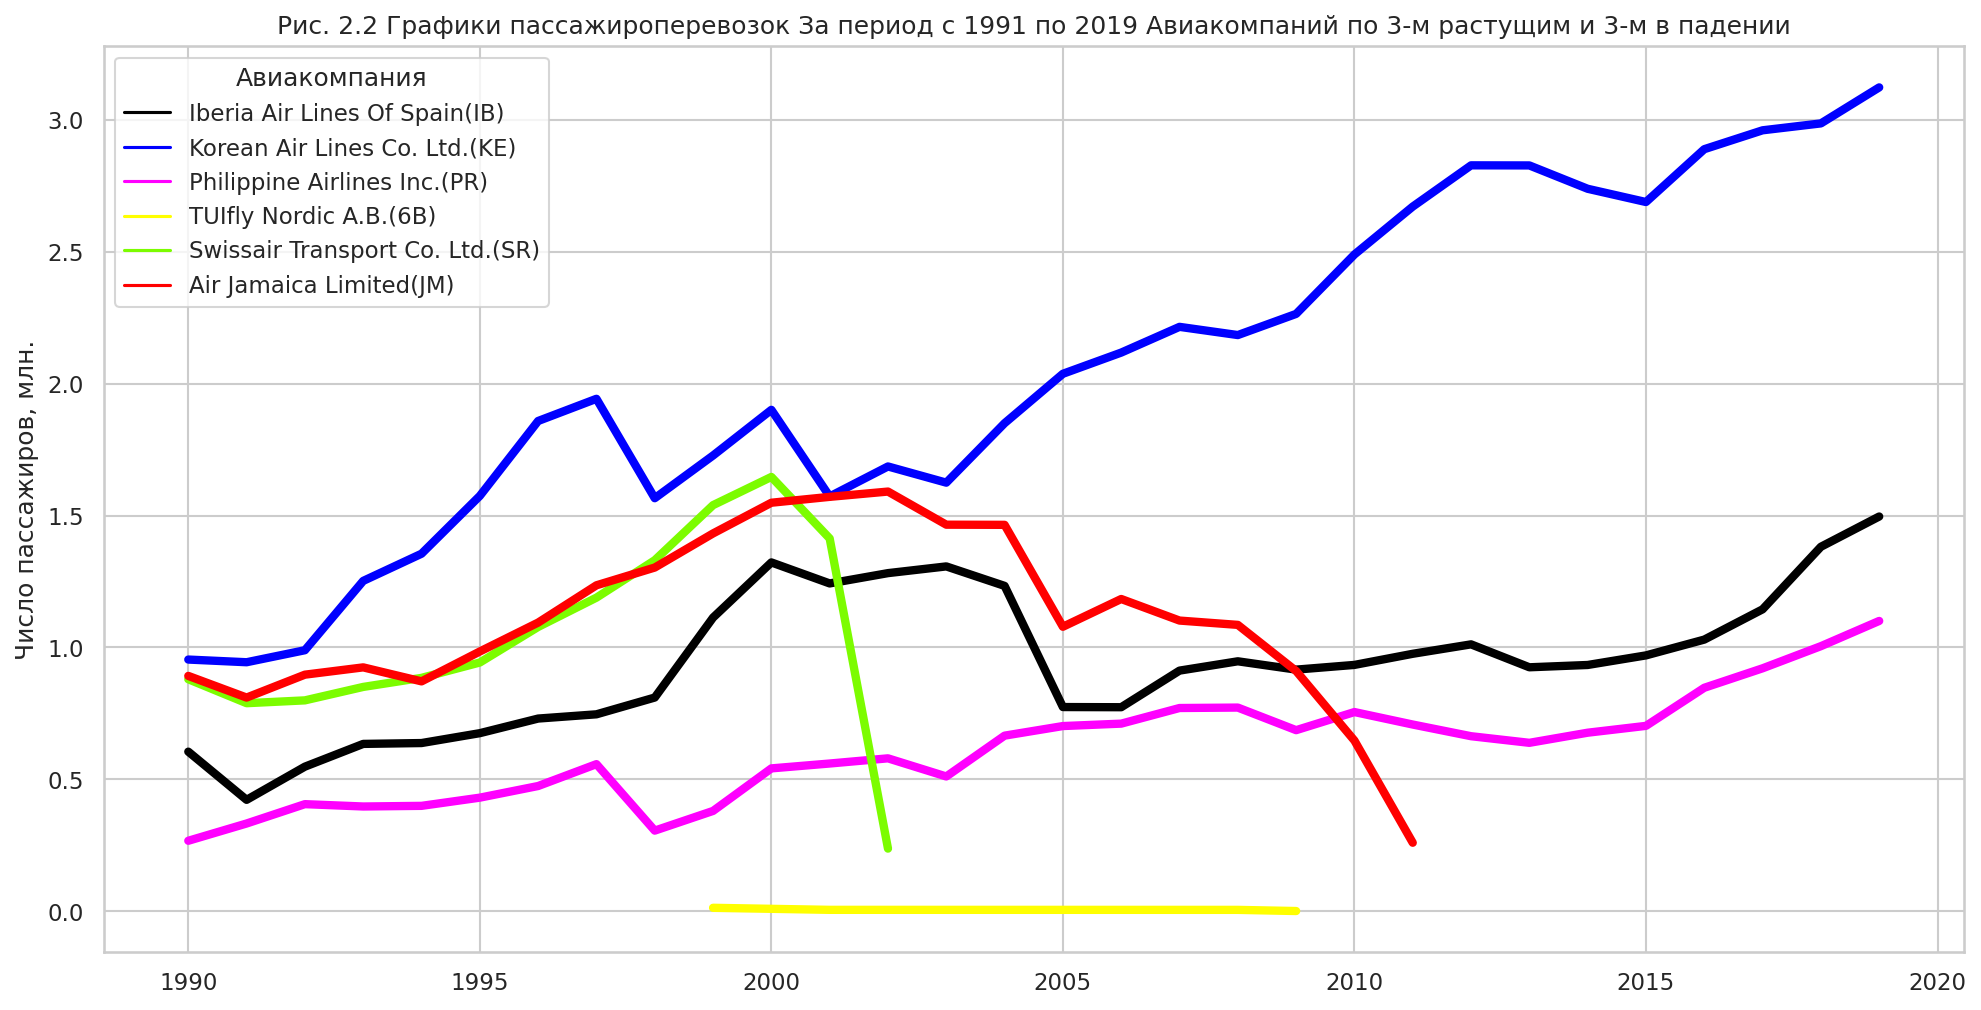

In [ ]:
#Откинем "пандемийные" года 2020-2021, поскольку у всех компаний наблюдалось 
# падение пасссжиропотока и соберем в новый Датасет суммированные данные по годам

df_Not_2020 = df1.query("Year < 2020")
consData = df_Not_2020[['Year', 'carrier','Total']].groupby(['Year', 'carrier']).sum() \
.sort_values(by=["carrier", 'Year'], ascending=True)
consData.reset_index(inplace=True) 

#Пробежимся по всем авиакомпаниям из нового Датасета и соберем в новой колонке 
#"change" изменения в %% пасажиропотока по отношению к предыдущему период с помощью
# функции pct_change()

air_craft_list = consData.carrier.unique()
for c in air_craft_list:
  consData.loc[consData['carrier']==c,['change']] = consData.Total.pct_change().mul(100).round(2)
consData = consData.sort_values('change', ascending=False)

# Добавим поле наименование авиакомпании для наглядности

consData = consData.merge(airlines)[['carrier', 'AirCraft', 'Year', 'Total']] 
consData['AirCraft'] = consData['AirCraft']+'('+consData['carrier']+')'

#Отберем по сто значений с "головы" и "хвоста" получившегося Датасета, 
# отсортированного ранее по размеру изменений


#И возьмём по три компании "сверху" и "снизу"
top100 = consData.head(100).dropna().groupby(by=['carrier']).size().sort_values().tail(3) 
down100 = consData.tail(100).dropna().groupby(by=['carrier']).size().sort_values().tail(3)

# Построим графики по этим компаниям с макисмальным ростом и максимальным падением

colors = [["black"], ["blue"], ["magenta"], ["yellow"], ["lawngreen"], ["red"]]
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')
labels_to_graf = list()
i = 0
for c in top100.index:
  labels_to_graf.append(consData.loc[consData['carrier']==c].AirCraft)
  gx = sns.lineplot(data=consData.loc[consData['carrier']==c], x='Year', y='Total',\
                    linewidth=4, hue = 'AirCraft', palette = colors[i])
  i +=1
for c in down100.index:
  labels_to_graf.append(consData.loc[consData['carrier']==c].AirCraft)
  gx = sns.lineplot(data=consData.loc[consData['carrier']==c], x='Year', y='Total',\
                    linewidth=4, hue = 'AirCraft', palette = colors[i])
  i +=1
ylabels = ['{:.1f}'.format(x) for x in gx.get_yticks()/1000000]
gx.set_yticklabels(ylabels)
gx.set(title='Рис. 2.2 Графики пассажироперевозок За период с 1991 по 2019\
 Авиакомпаний по 3-м растущим и 3-м в падении')
gx.set(ylabel="Число пассажиров, млн.",
       xlabel='')
plt.legend(title='Авиакомпания')
plt.show()

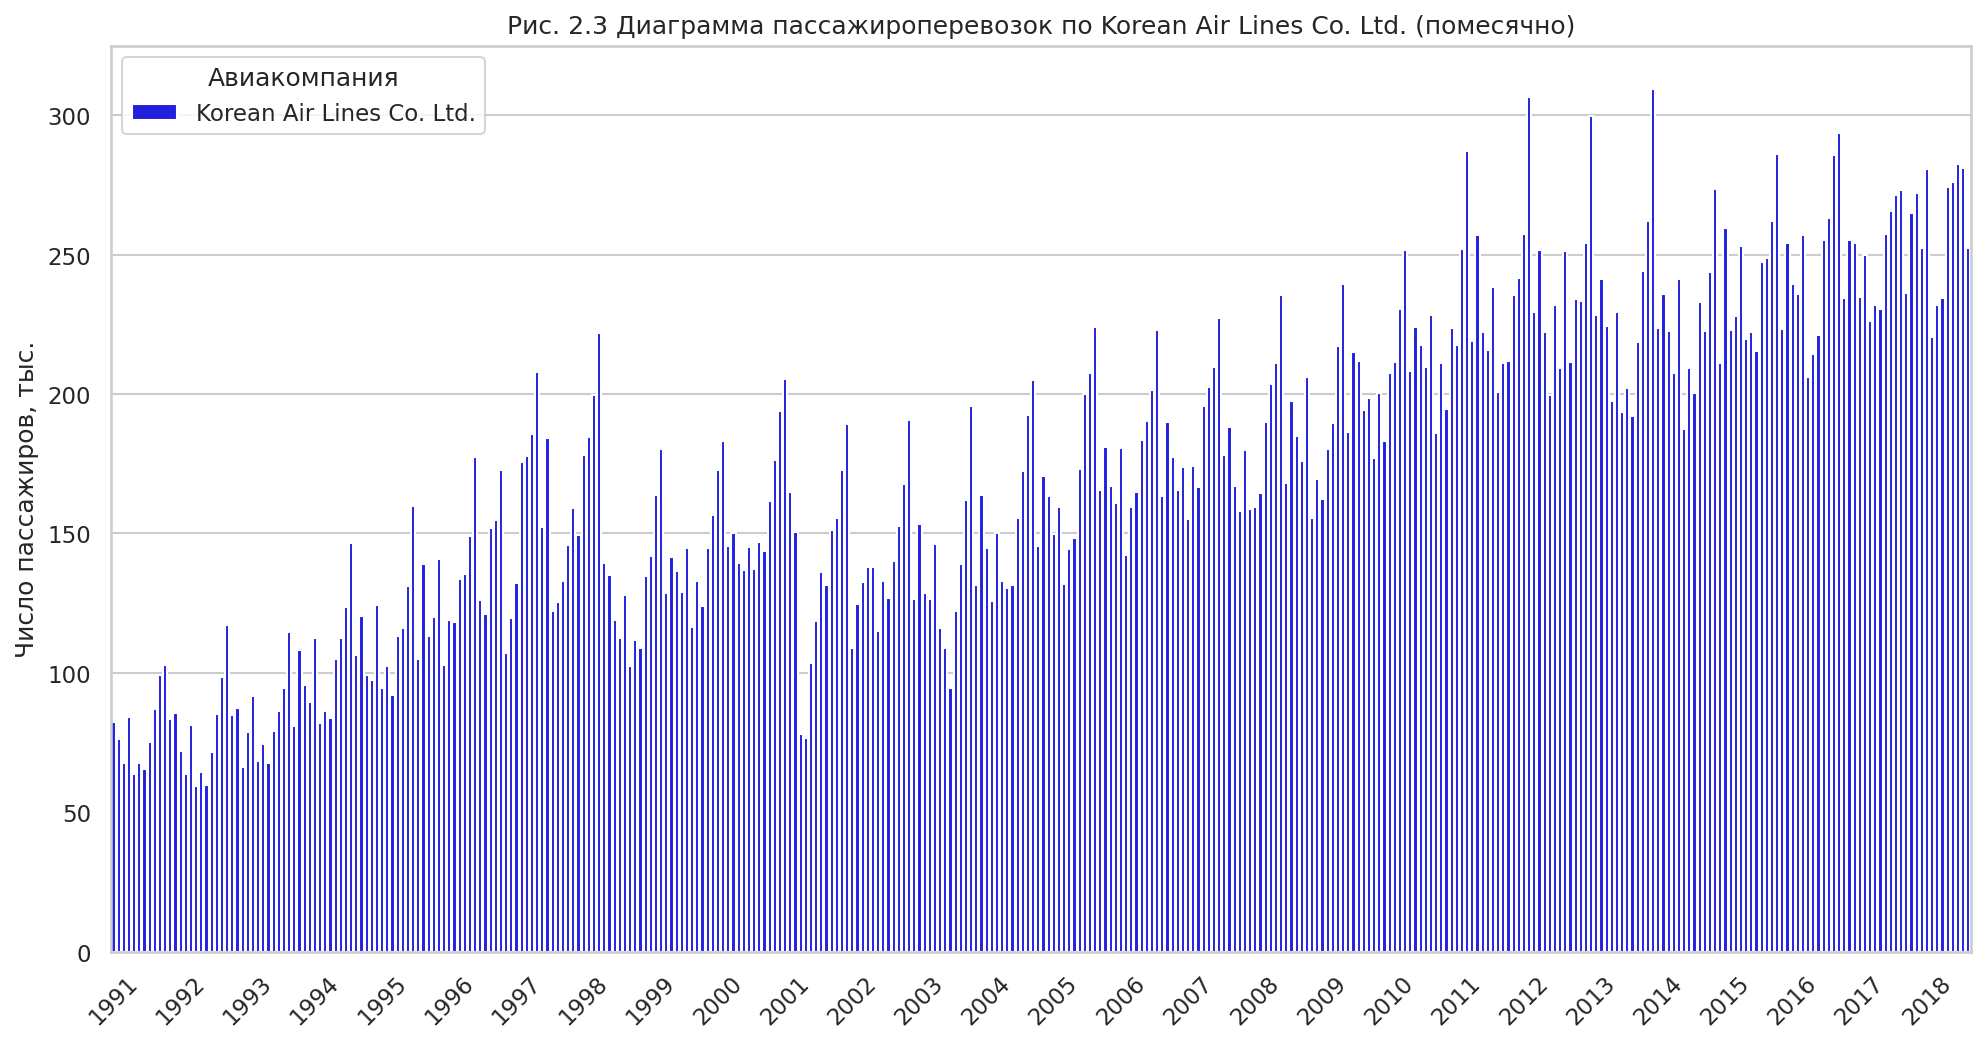

In [ ]:
#Соберём еще один Датасет с суммированными данными об объеме пассажироперевозок ПОМЕСЯЧНО

df2_2 = df_Not_2020.copy()
df2_2['Month_Year'] = df2_2['Year'].astype(str) +'_'+df2_2['Month'].astype(str)
df2_2 = df2_2[['Month_Year', 'carrier', 'Total']].groupby(['Month_Year', 'carrier'])\
.sum().sort_values(by=["carrier", 'Month_Year'], ascending=True)
df2_2.reset_index(inplace=True) 

# Добавим поле наименование авиакомпании для наглядности
df2_2 = df2_2.merge(airlines)[['carrier', 'AirCraft', 'Month_Year', 'Total']] 

#Создим подписи для оси Х, для нагляности
xlabels = []
for a in range(1991, 2020):
  xlabels.append(a)
  for b in range(1,13):
    xlabels.append('')

#Возьмём код максимально разстущей компании исходя из графиков на Рис 2.2 - 
#"KE" Korean Air Lines Co. Ltd. и построим по ней столбчатую диаграмму

ac_top = 'KE'
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')

gx = sns.barplot(data=df2_2.loc[df2_2['carrier']==ac_top], x='Month_Year', \
                 y='Total', hue = 'AirCraft', palette = ['blue'])
ylabels = ['{:.0f}'.format(x) for x in gx.get_yticks()/1000]
gx.set_yticklabels(ylabels)
gx.set_xticklabels(xlabels, rotation=45)
gx.set(title='Рис. 2.3 Диаграмма пассажироперевозок по '+airlines.loc[airlines['carrier']\
                  ==ac_top]['AirCraft'].values[0]+' (помесячно)')
gx.set(ylabel="Число пассажиров, тыс.",
       xlabel='')
plt.legend(title='Авиакомпания')
plt.show()

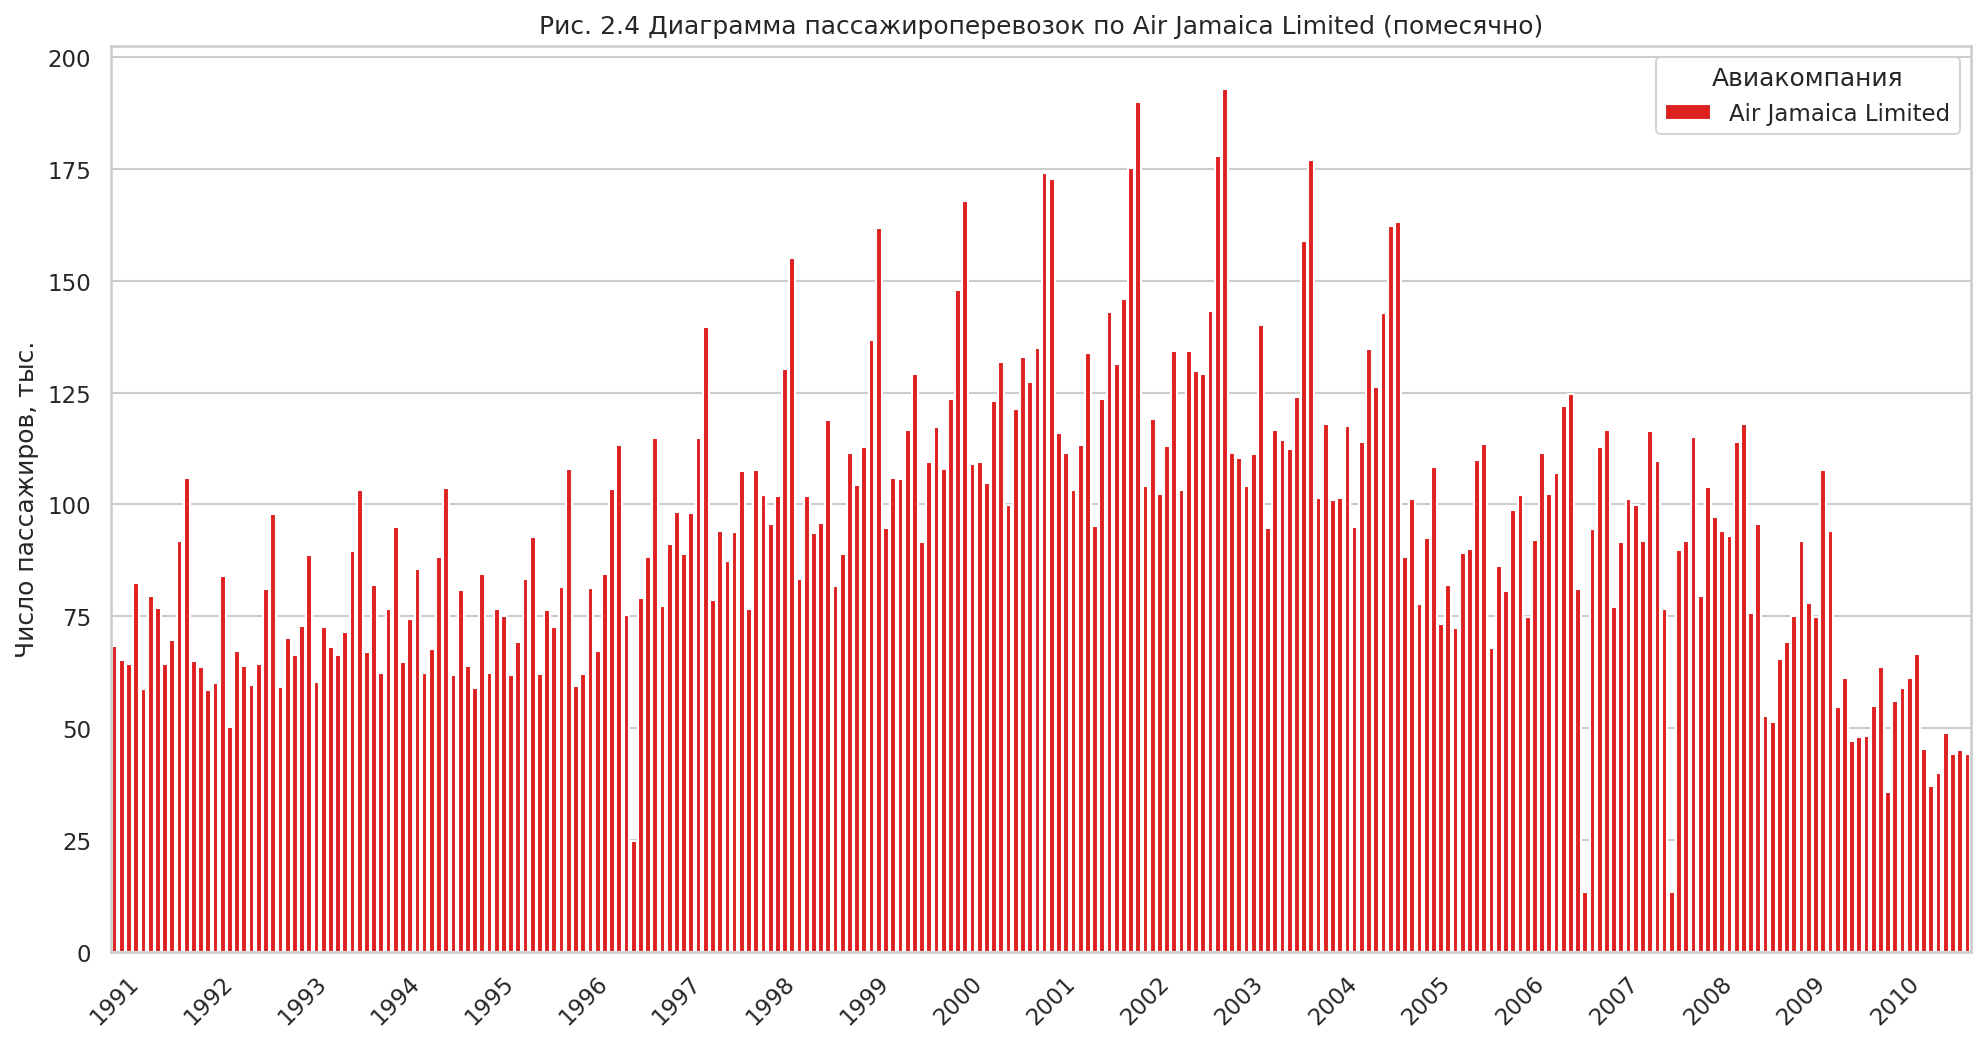

In [ ]:
#Возьмём код компании с самым заментным падением исходя из графиков на Рис 2.2 
#- "JM" Air Jamaica Limited и построим по ней столбчатую диаграмму

#Создим подписи для оси Х, для нагляности
xlabels = []
for a in range(1991, 2020):
  xlabels.append(a)
  for b in range(1,13):
    xlabels.append('')

ac_down = 'JM'
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')

gx = sns.barplot(data=df2_2.loc[df2_2['carrier']==ac_down], x='Month_Year',\
                 y='Total', hue = 'AirCraft',palette =  ['red'])
ylabels = ['{:.0f}'.format(x) for x in gx.get_yticks()/1000]
gx.set_yticklabels(ylabels)
gx.set_xticklabels(xlabels, rotation=45)
#gx.set(xticklabels=[])
gx.set(title='Рис. 2.4 Диаграмма пассажироперевозок по '+airlines.loc[airlines['carrier']\
                 ==ac_down]['AirCraft'].values[0]+' (помесячно)')
gx.set(ylabel="Число пассажиров, тыс.",
       xlabel="")
plt.legend(title='Авиакомпания')
plt.show()

**Выводы**: Из графиков на Рис. 2.3 и 2.4 видно,  что "Korean Air Lines" - стабильно растет на всём периоде, а "Air Jamaica" - не смотря на рост до 2002 года, в последущие 8 лет заметно теряла клиентов, а после 2010 года данные о перевозках отсутвуют, из чего можно сделать вывод об отсутвии указанной компании на рынке. И по обоим компаниям видно сезонное именение пассажирапотока в зависимости от месяца.

# Задание 3. Загруженность аэропортов

Вопрос 1: Нарисуйте топ 5 по загруженности аэропортов В США за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года. Для кодировки аэропортов используется код IATA (International Air Transport Association airport code).

Ответ:


In [ ]:
iata_url = "https://datahub.io/core/airport-codes/r/airport-codes.csv"
iata = pd.read_csv(iata_url)
us_airports = iata[iata.iso_country == 'US'][['iata_code','municipality']].dropna().set_index('iata_code')
for_airports = iata[iata.iso_country != 'US'][['iata_code','municipality']].dropna().set_index('iata_code')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



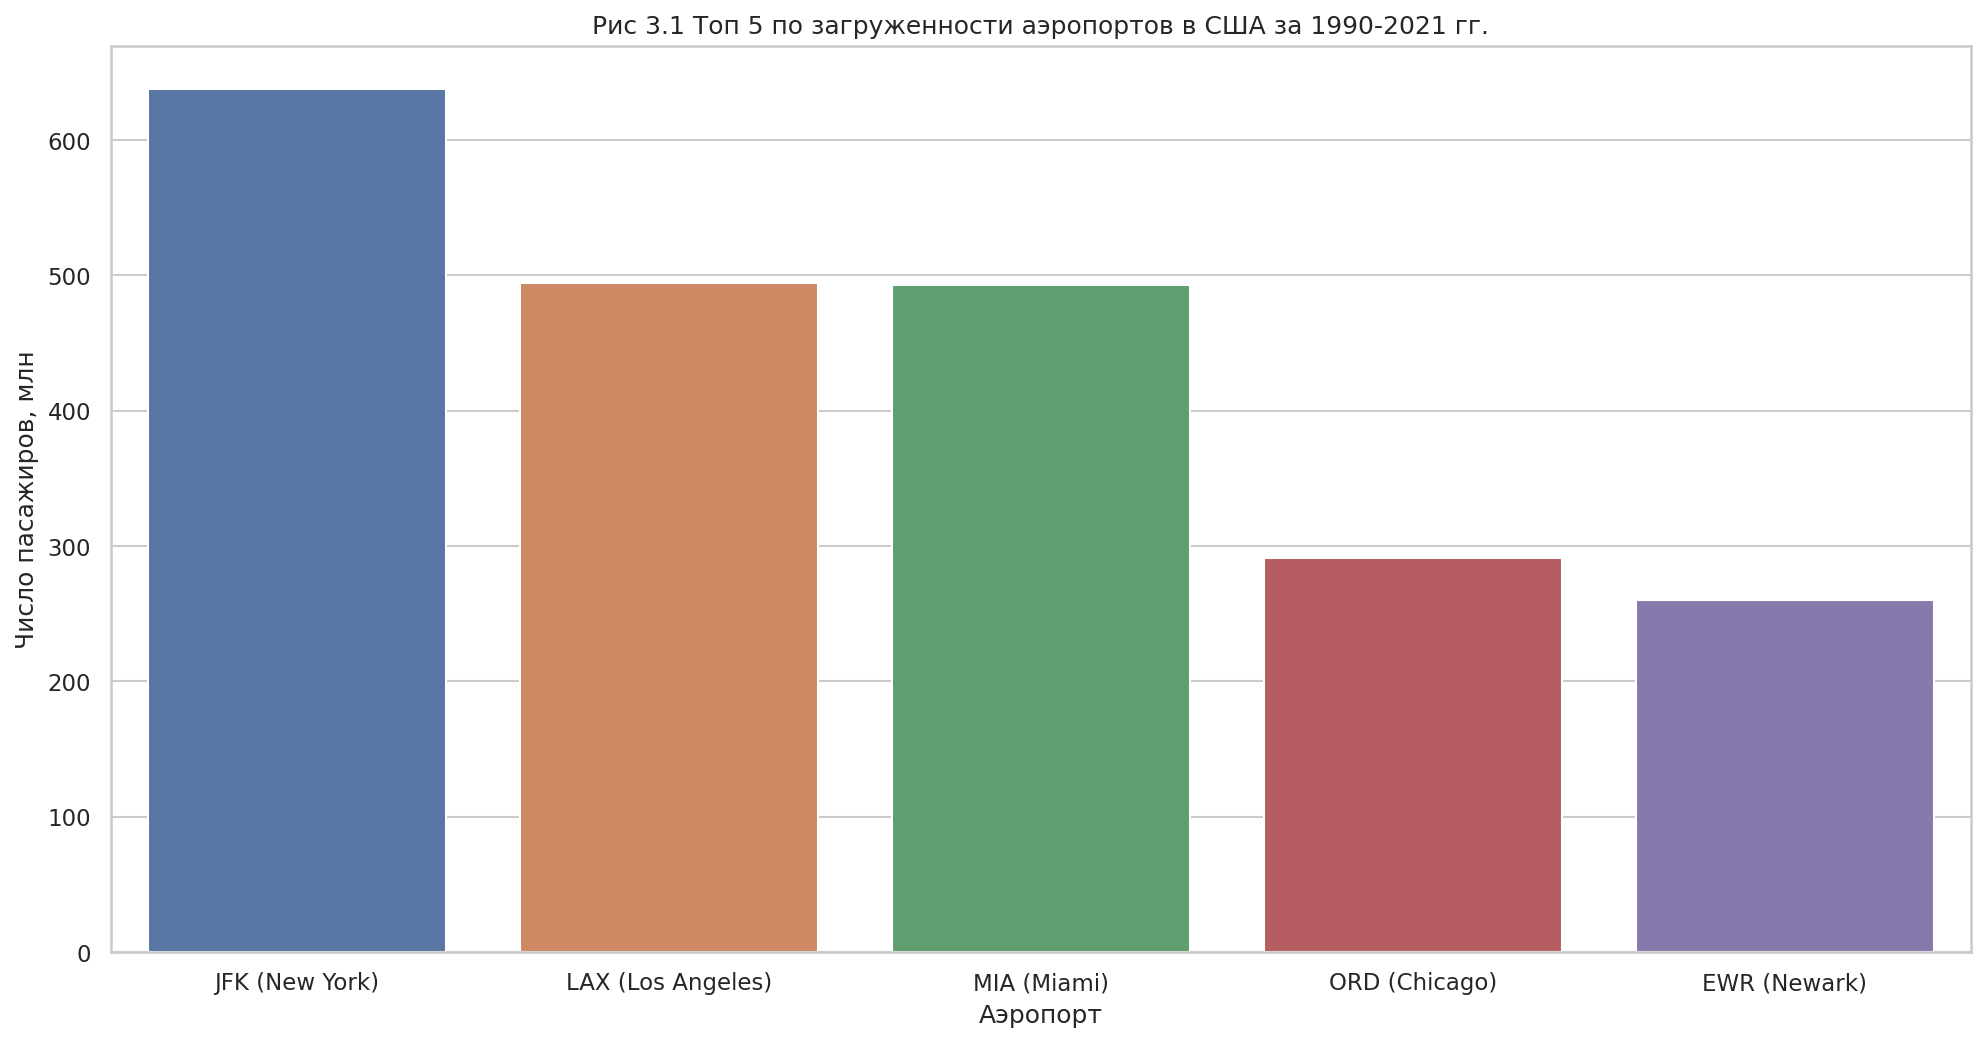

In [ ]:
df3 = df1.join(us_airports, on='usg_apt')[['usg_apt', 'municipality', 'Year', 'Total']]
us_top5 = df3[['usg_apt', 'Total']].groupby(['usg_apt']).sum() \
.sort_values(by="Total", ascending=False) \
.head(5) \
.drop('Total', axis=1) \
.reset_index()['usg_apt'] \
.tolist()

df3 = df3[df3['usg_apt'].isin(us_top5)]
df3["airport"] = df3["usg_apt"] + ' (' + df3["municipality"] + ')'
df3 = df3.drop(['usg_apt', 'municipality'], axis=1) \
.groupby(['airport']) \
.sum().reset_index().sort_values(by="Total", ascending=False)

f, ax = plt.subplots(figsize=(16, 8), dpi=150)
g = sns.barplot(x="airport", y="Total", data=df3)

ylabels = ['{:.0f}'.format(x) for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
ax.set(title="Рис 3.1 Топ 5 по загруженности аэропортов в США за 1990-2021 гг.", 
       ylabel="Число пасажиров, млн",
       xlabel="Аэропорт")
sns.set_style("darkgrid", { 'grid.color': ".6", 
                            'grid.linestyle': "-"})

Вопрос 2: Нарисуйте топ 5 популярных иностранных аэропортов (ВНЕ США) за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года.

Ответ:

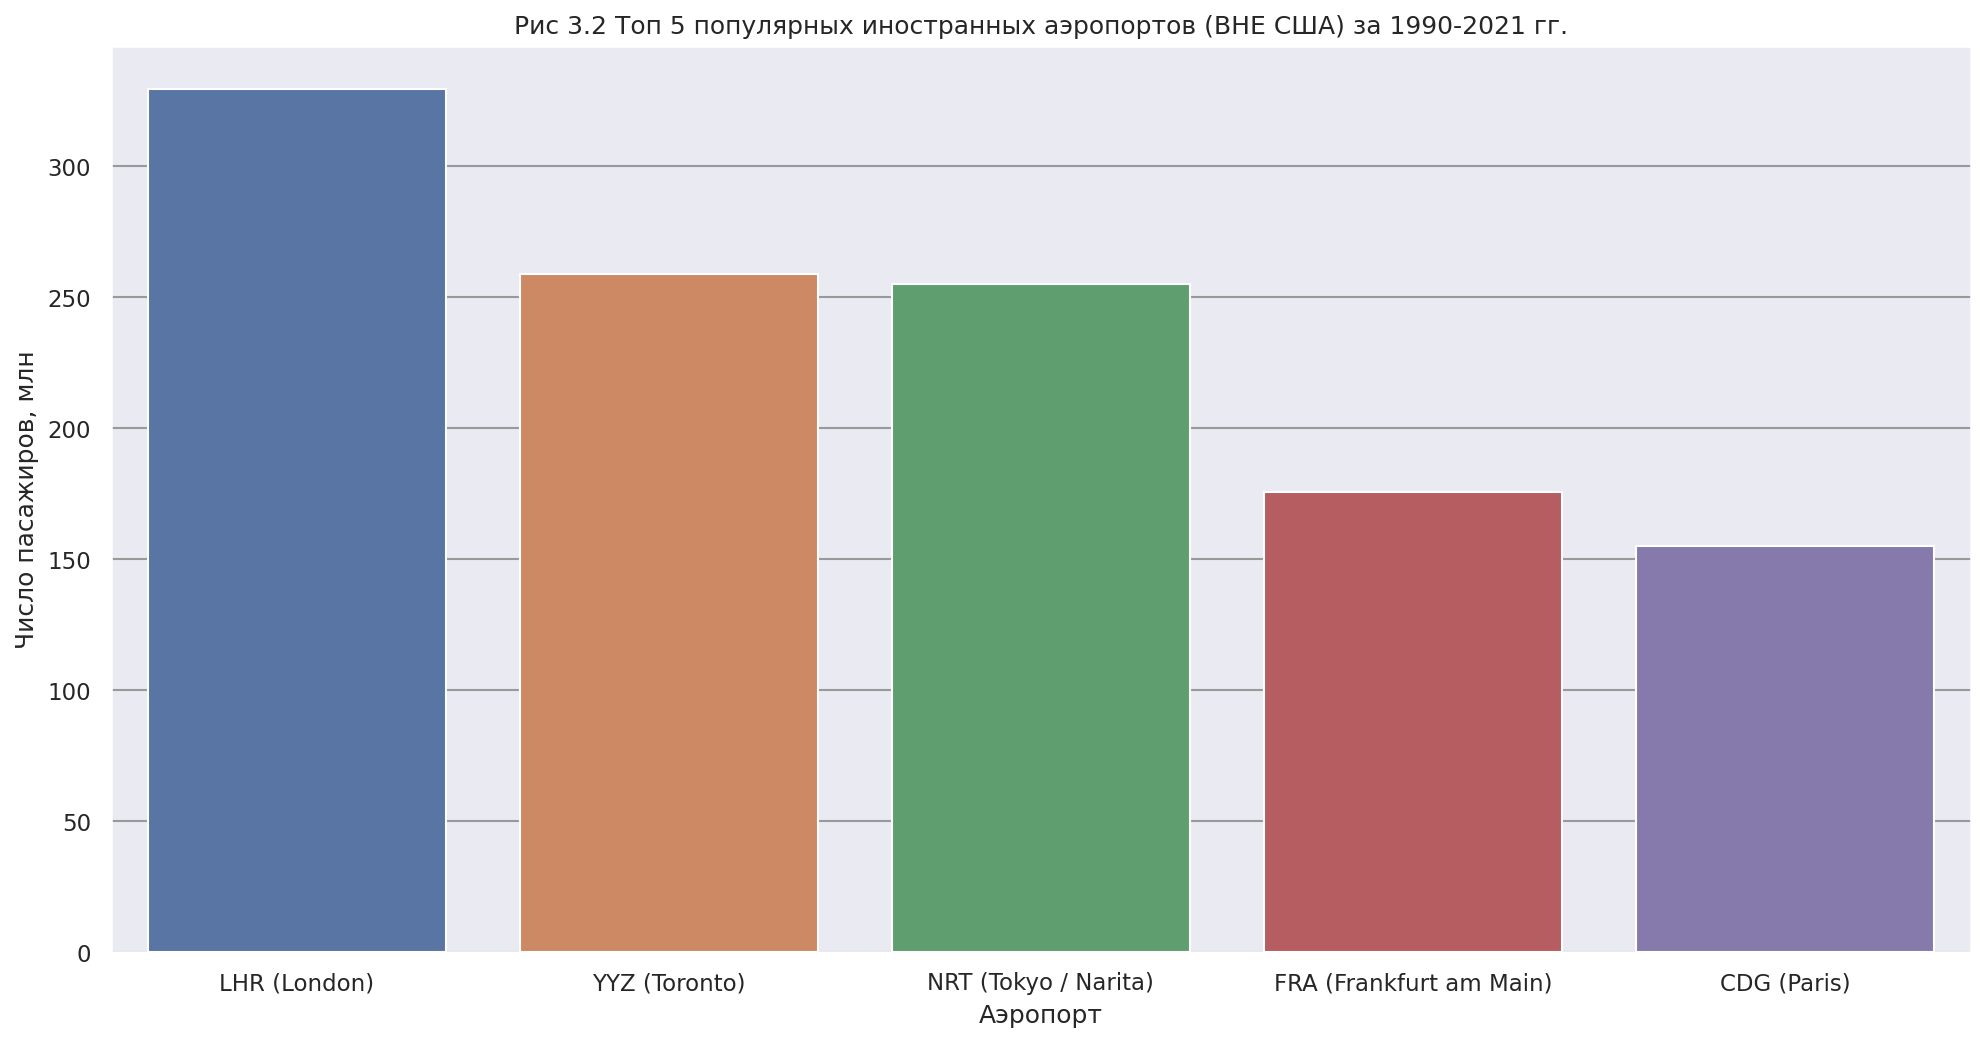

In [ ]:
df4 = df1.join(for_airports, on='fg_apt')[['fg_apt', 'municipality', 'Year', 'Total']]
df4
for_top5 = df4[['fg_apt', 'Total']].groupby(['fg_apt']).sum() \
.sort_values(by="Total", ascending=False) \
.head(5) \
.drop('Total', axis=1) \
.reset_index()['fg_apt'] \
.tolist()

df4 = df4[df4['fg_apt'].isin(for_top5)]
df4["airport"] = df4["fg_apt"] + ' (' + df4["municipality"] + ')'
df4 = df4.drop(['fg_apt', 'municipality'], axis=1) \
.groupby(['airport']) \
.sum().reset_index().sort_values(by="Total", ascending=False)

f, ax = plt.subplots(figsize=(16, 8), dpi=150)
g = sns.barplot(x="airport", y="Total", data=df4)

ylabels = ['{:.0f}'.format(x) for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
ax.set(title="Рис 3.2 Топ 5 популярных иностранных аэропортов (ВНЕ США) за 1990-2021 гг.", 
       ylabel="Число пасажиров, млн",
       xlabel="Аэропорт")
sns.set_style("darkgrid", { 'grid.color': ".6", 
                            'grid.linestyle': "-"})

# Задание 4. Подробный анализ загруженности

Вопрос 1: Для каждого года выведите топ месяцев, в которых трафик был максимальным (постарайтесь визуализировать так, чтобы с первого взгляда график был понятен и читался "вне контекста")

Ответ:

In [ ]:
#data preparing
df4 = df1.groupby(["Year", "Month"], as_index = False)["Total"].sum()
df4 = df4.sort_values(by = ["Year", "Total"], ascending = [False, False])

#Select 5 month with max traffic for each year
df4_max = df4.groupby(["Year"]).apply(lambda x: x.nlargest( 5, ['Total'] )).reset_index(drop = True)

Отобразим на графике зависимость числа пассажиров от месяца года для каждого года нашей выборки:

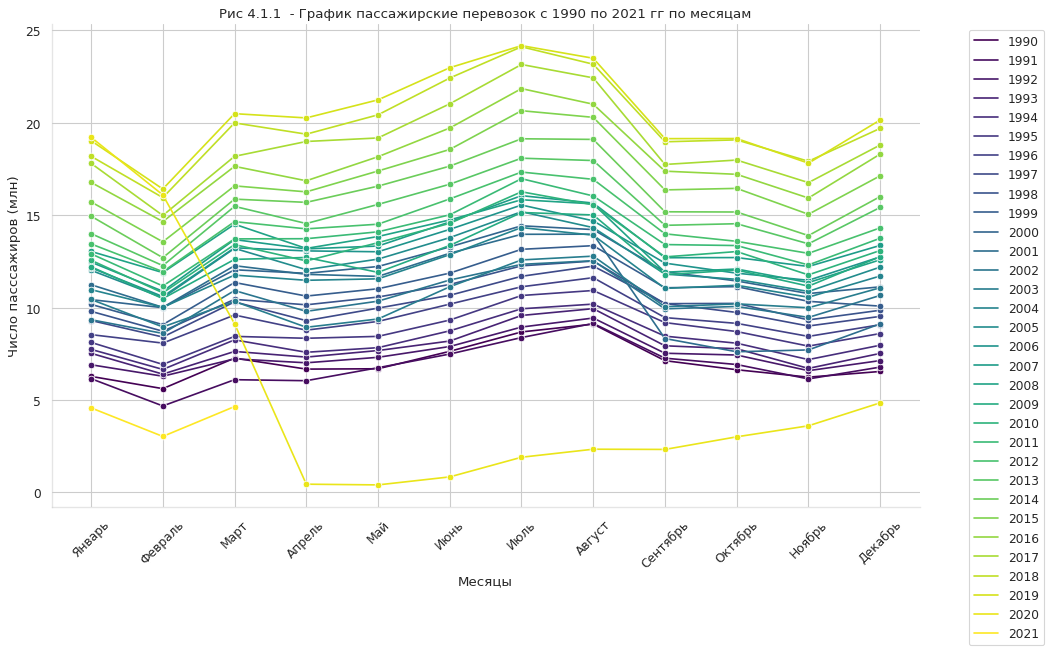

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize = (14,8), dpi = 80)
g = sns.lineplot(data = df4, x = "Month", y = "Total", hue = "Year", marker = "o", legend = "full", palette = "viridis")

plt.xticks( range(1,13), months, rotation = 45)
ylabels = ['{:.0f}'.format(x) for x in g.get_yticks()/1000_000]
g.set_yticklabels(ylabels)

plt.legend(loc = 'upper center', bbox_to_anchor = (1.1, 1.0), ncol = 1)
plt.xlabel('Месяцы')
plt.ylabel("Число пасссажиров (млн)")
plt.title('Рис 4.1.1  - График пассажирские перевозок с 1990 по 2021 гг по месяцам')

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   

plt.show()
plt.savefig('4_1_1.png', bbox_inches = 'tight')

Из данного графика мы видим, что:
1) количество перевезенных пассажиров растет с каждым годом ( Исключение - 2020 гг. Наблюдается резкое падение перевозок в марте-апреле 2020 г) 
2) форма линий графиков для каждого года похожи по форме, т.е мы видим всплеск пассажирских перевозок приблизительно с мая по август и падение с сентября по январь.

Теперь проанализируем пассажирские перевозки для каждого года из наших данных и выделим для каждого года по 5 месяцев с максимальным траффиком: 

In [ ]:
def annotate_with_arrow (x):
  x_coord = x['Month']
  y_coord = x['Total'] + 2500_000
  boxstyle = "larrow,pad=0.15"
  rotation = 60
  if x['Total'] >= 20_000_000:
    y_coord -= 12_000_000
    rotation =  -60

  ax.annotate(months[int(x['Month']) - 1], (x_coord, y_coord), 
                                          rotation = rotation, fontsize = 15,
                                          bbox = dict(boxstyle = boxstyle,  fc = "mintcream", ec = "b", lw = 1))

No handles with labels found to put in legend.


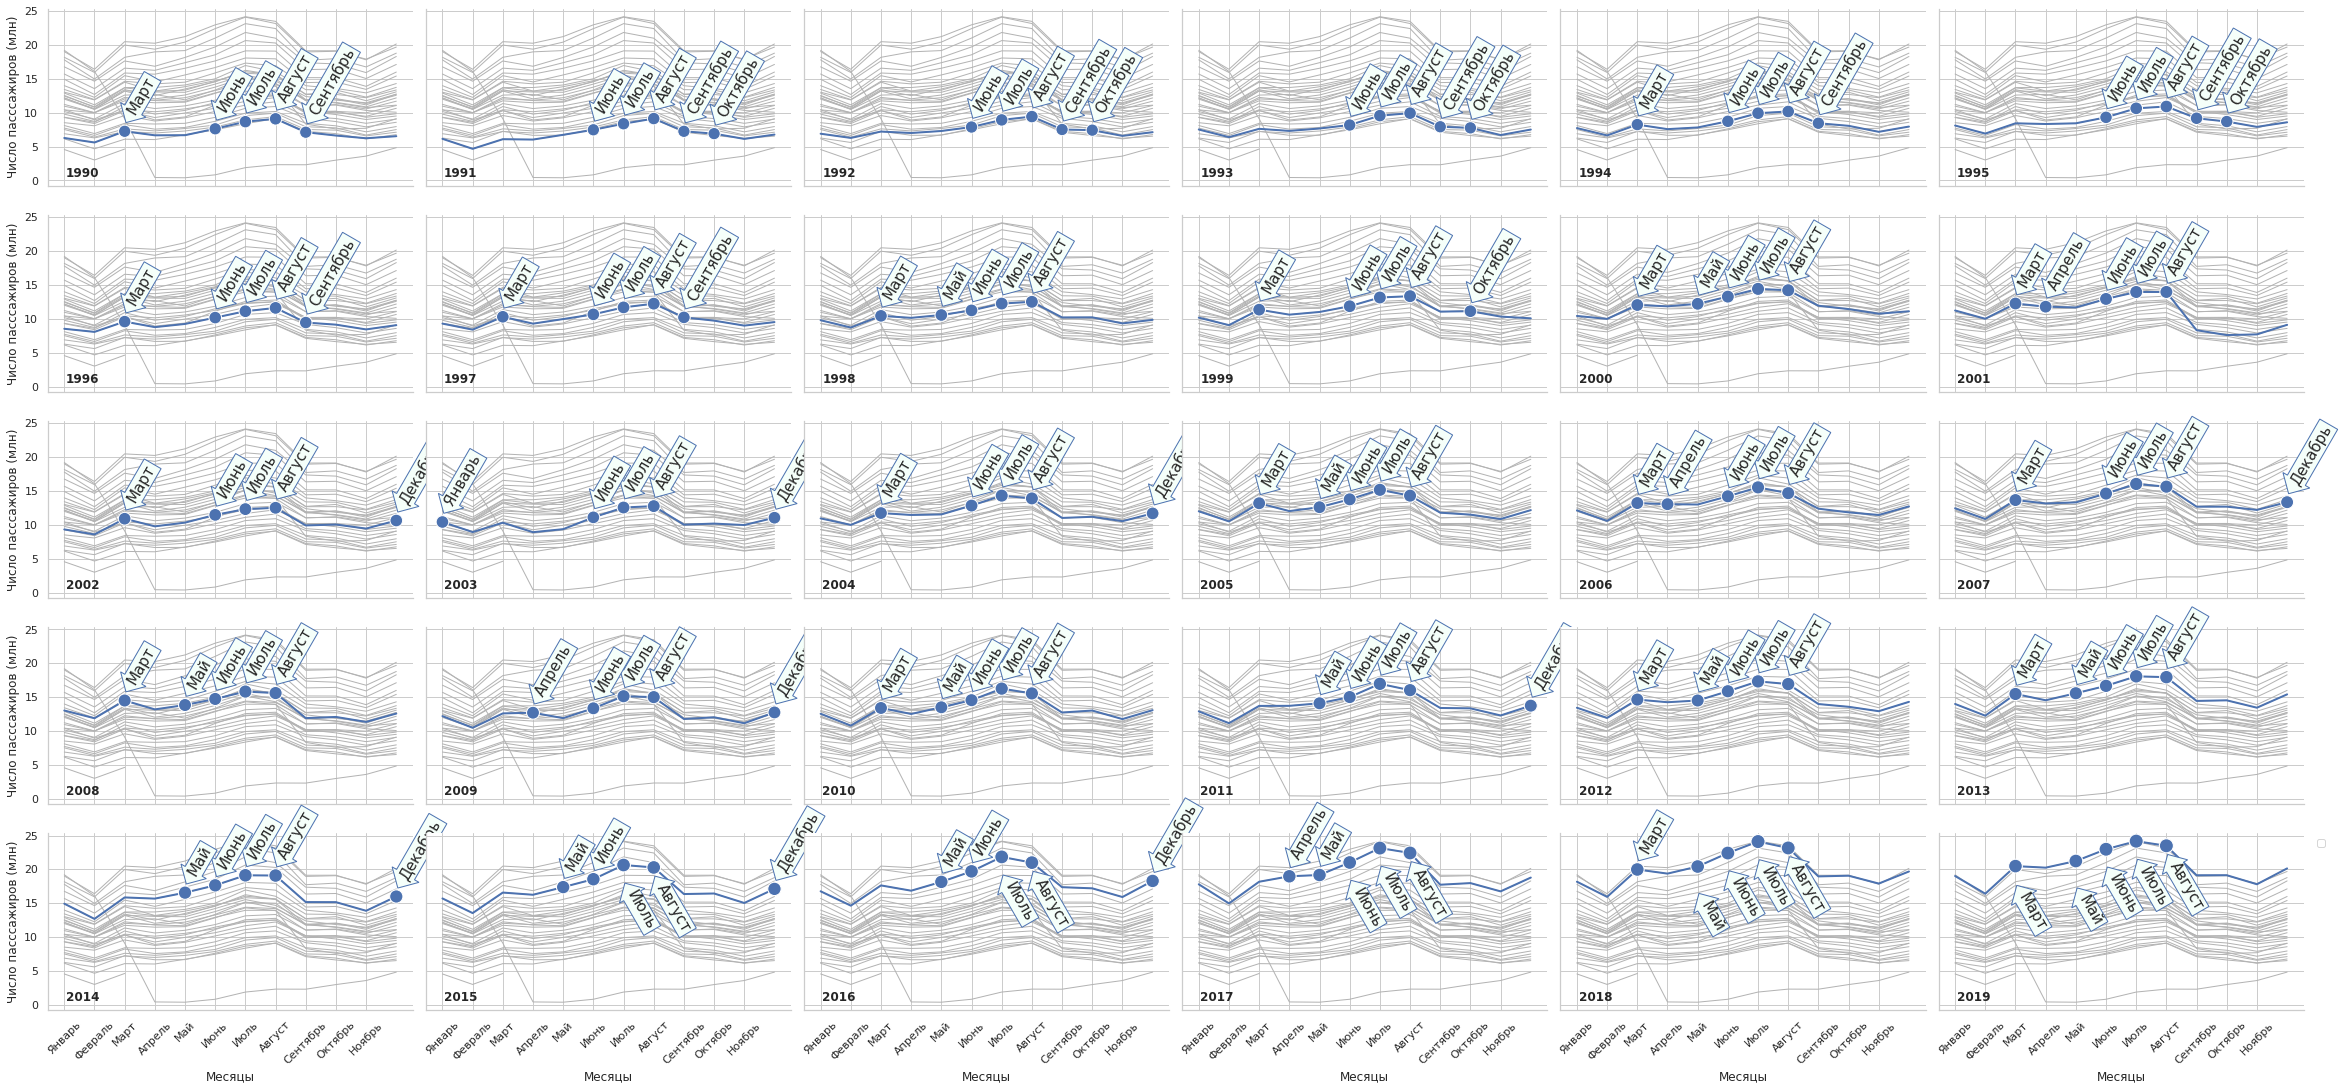

<Figure size 432x288 with 0 Axes>

In [ ]:

sns.set_style("whitegrid")

#drop 2020 and 2021 year as they are not representative
df4_max_mod = df4_max.drop( df4_max[ df4_max.Year.isin( [2020, 2021] )].index)


#draw grid of graphics with points of month with max traffic
g = sns.relplot(
    data = df4_max_mod, x = "Month", y = "Total", col = "Year", 
    palette = "crest",
    markers=['o'], size = "Total", sizes = (150, 200),
    zorder = 4,
    col_wrap = 6, height = 3, aspect = 1.8, legend = False)

# Iterate over each subplot to customize 
for year, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.05, .05, year, transform = ax.transAxes, fontweight = "bold")

    # Plot every year's  series in the background
    sns.lineplot(
        data = df4, x = "Month", y = "Total", units = "Year",
        estimator = None, color = ".7", linewidth = 1, ax = ax )

    # Plot current year's  series by color line
    sns.lineplot(
        data = df4[df4.Year == year], x = "Month", y = "Total",
        estimator = None,  linewidth = 2, ax = ax)

    #draw arrows with max traffic month names
    df4_max[df4_max.Year == year].apply(lambda x: annotate_with_arrow(x), axis = 1)


    ax.set_xticks(range( 1, 12))
    xlabels = [months[int(x - 1)] for x in ax.get_xticks()]
    ax.set_xticklabels(xlabels, rotation = 45)

plt.legend(loc ='upper left', bbox_to_anchor = (1.02, 1.0), ncol = 1)

ax.set_yticks( range(0, 30_000_000, 5_000_000))
ylabels = ['{:.0f}'.format(x) for x in ax.get_yticks() / 1000_000]
ax.set_yticklabels( ylabels )

g.set_titles("")
g.set_axis_labels("Месяцы", "Число пасссажиров (млн)")

#plt.title("Рис 4.1.2 - График пассажирских перевозок по годам. Стрелками указаны месяцы с максимальным траффиком в году")
plt.show()
plt.savefig('4_1_2.png', bbox_inches = 'tight')

На данном графике мы видим зависимость кол-ва  перевозок от месяца  для каждого года, а также топ-5  месяцев с максимальным кол-вом перевозок для каждого года. Визуально можно выделить наиболее часто встречающиеся в топе месяцы: Июнь, Июль ,Август. 

Рассмотрим также распределение наиболее активных в плане пассажирского траффика  месяцев:

<Figure size 2400x1200 with 0 Axes>

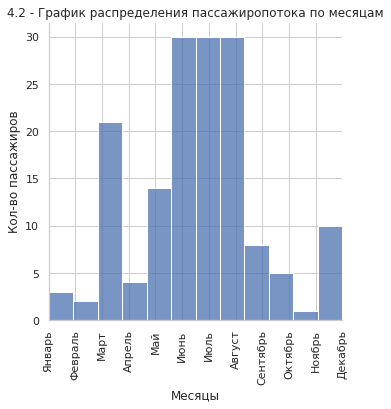

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set_theme(style = 'whitegrid')
g = sns.displot(x = 'Month', data = df4_max, bins = 12)
plt.xlabel('Месяцы') 
xlabels = [months[int(x-1)] for x in ax.get_xticks()]
plt.xticks( range(1, 13), months, rotation = "vertical")
plt.ylabel('Кол-во пассажиров') 
plt.xlim(1,12)
plt.title("4.2 - График распределения пассажиропотока по месяцам")

plt.show()
plt.savefig('4_2.png', bbox_inches = 'tight')

Выведем месяцы в порядке их популярности с точки зрения пассажирских перевозок: 

In [ ]:
df_top = df4_max.Month.value_counts().to_frame("Counts").reset_index().rename(columns = {'index': 'Month'})
df_top["Month"] = df_top["Month"].transform(lambda x : months[x - 1])
df_top

Month  Counts
0     Август      30
1       Июль      30
2       Июнь      30
3       Март      21
4        Май      14
5    Декабрь      10
6   Сентябрь       8
7    Октябрь       5
8     Апрель       4
9     Январь       3
10   Февраль       2
11    Ноябрь       1

Вопрос 2: Есть ли какие-то повторяющиеся месяцы, входящие в топ из года в год (или несколько лет подряд)? Если да, то какие для этого могут быть причины? Выдвиньте несколько гипотез.

Ответ:



Из предыдущих графиков мы можем видеть, что наиболее "активные"  месяцы - это Июнь, Июль, Август. Т.к. это летние месяцы, мы можем выдвинуть гипотезу: *Количество пасссажирских перевозок  в летние месяцы возрастает происходит*. Причиной, вероятно, являются  каникулы школьников и студентов, а также комфортная погода в это время года, и ,как следствие, популярность данного периода для отпусков и путешествий.
Также мы можем видеть, что в Марте, Мае и Декабре количество  перевозок несколько больше, чем в оставшиеся месяцы. Извесстный факт, что в  последние 2 недели Марта, в конце Мая и в конце Декабря начинаются каникулы у школьников и студентов. Следовательно, можно выдвинуть гипотезу, что *пассажирские перевозки становятся более интенсивными в дни каникул.*


Вопрос 3: Какое кол-во людей (в процентах) потеряли ТОП 5 **авиакомпаний** за период февраль-декабрь 2020 года, в сравнении с периодом февраль-декабрь 2019 года? Отобразите на графике. 

Ответ:

In [ ]:
top5 = df1920.loc[(df1920['Year'] == 2019) & (df1920['Month'] != 1)].groupby(['carrier'])['Total'].sum().to_frame().sort_values(by='Total', ascending=False).reset_index().head(5)  # находим топ-5 авиакомпаний по пассажиропотоку за 2019г, не включая январь, по ним будем делать графики.
top5

carrier     Total
0      AA  27430074
1      UA  26562352
2      DL  24133783
3      B6   8345828
4      BA   7003517

In [ ]:
top5 = top5['carrier'].tolist() #  Не хотим писать список вручную, воспользуемся .методом tolist
top5

['AA', 'UA', 'DL', 'B6', 'BA']

In [ ]:
df_top = df1920.loc[(df1920['carrier'].isin(top5)) & (df1920['Month'] != 1)] # находим строчки, соответствующие списку, созданному выше за периоды фев19-дек19+фев20-дек20
df_top = df_top.groupby(['Year','Month','carrier'])['Total'].sum().to_frame().reset_index() #  сгруппируем по году-месяцу-авиакомпании, получим фрейм с подсчитанными значениями пассажиропотока
df_top

Year  Month carrier    Total
0    2019      2      AA  2033546
1    2019      2      B6   632782
2    2019      2      BA   469391
3    2019      2      DL  1712820
4    2019      2      UA  1893404
..    ...    ...     ...      ...
105  2020     12      AA   923062
106  2020     12      B6   403781
107  2020     12      BA    52052
108  2020     12      DL   522508
109  2020     12      UA   717337

[110 rows x 4 columns]

In [ ]:
df_top.loc[(df_top['Year']==2019),['%']] = 100 # зададим 2019й год как 100%
df_top.loc[(df_top['Year']==2020),['%']] = [i/j * 100 for i,j in zip(df_top.loc[(df_top['Year']==2020)]['Total'], df_top[(df_top['Year']==2019)]['Total'])] # считаем процент в 2020
df_top

Year  Month carrier    Total           %
0    2019      2      AA  2033546  100.000000
1    2019      2      B6   632782  100.000000
2    2019      2      BA   469391  100.000000
3    2019      2      DL  1712820  100.000000
4    2019      2      UA  1893404  100.000000
..    ...    ...     ...      ...         ...
105  2020     12      AA   923062   37.817282
106  2020     12      B6   403781   53.159576
107  2020     12      BA    52052    8.726763
108  2020     12      DL   522508   25.929361
109  2020     12      UA   717337   28.863498

[110 rows x 5 columns]

In [ ]:
#Данный код взят мной у Михаила, с его позволения, и немного модифицирован под нужды наглядности легенды.
#Загрузим данные по кодам Авиакомпаний
airlines_url = 'https://raw.githubusercontent.com/beanumber/airlines/master/data-raw/airlines.csv'
airlines = pd.read_csv(airlines_url)
airlines = airlines.rename(columns={"Code": "carrier","Description": "AirCraft",})
airlines.set_index('carrier')
df_top = df_top.merge(airlines, how='left', on='carrier') # и смёрджим по столбцу carrier
df_top

Year  Month carrier    Total           %                AirCraft
0    2019      2      AA  2033546  100.000000  American Airlines Inc.
1    2019      2      B6   632782  100.000000         JetBlue Airways
2    2019      2      BA   469391  100.000000     British Airways Plc
3    2019      2      DL  1712820  100.000000    Delta Air Lines Inc.
4    2019      2      UA  1893404  100.000000   United Air Lines Inc.
..    ...    ...     ...      ...         ...                     ...
105  2020     12      AA   923062   37.817282  American Airlines Inc.
106  2020     12      B6   403781   53.159576         JetBlue Airways
107  2020     12      BA    52052    8.726763     British Airways Plc
108  2020     12      DL   522508   25.929361    Delta Air Lines Inc.
109  2020     12      UA   717337   28.863498   United Air Lines Inc.

[110 rows x 6 columns]

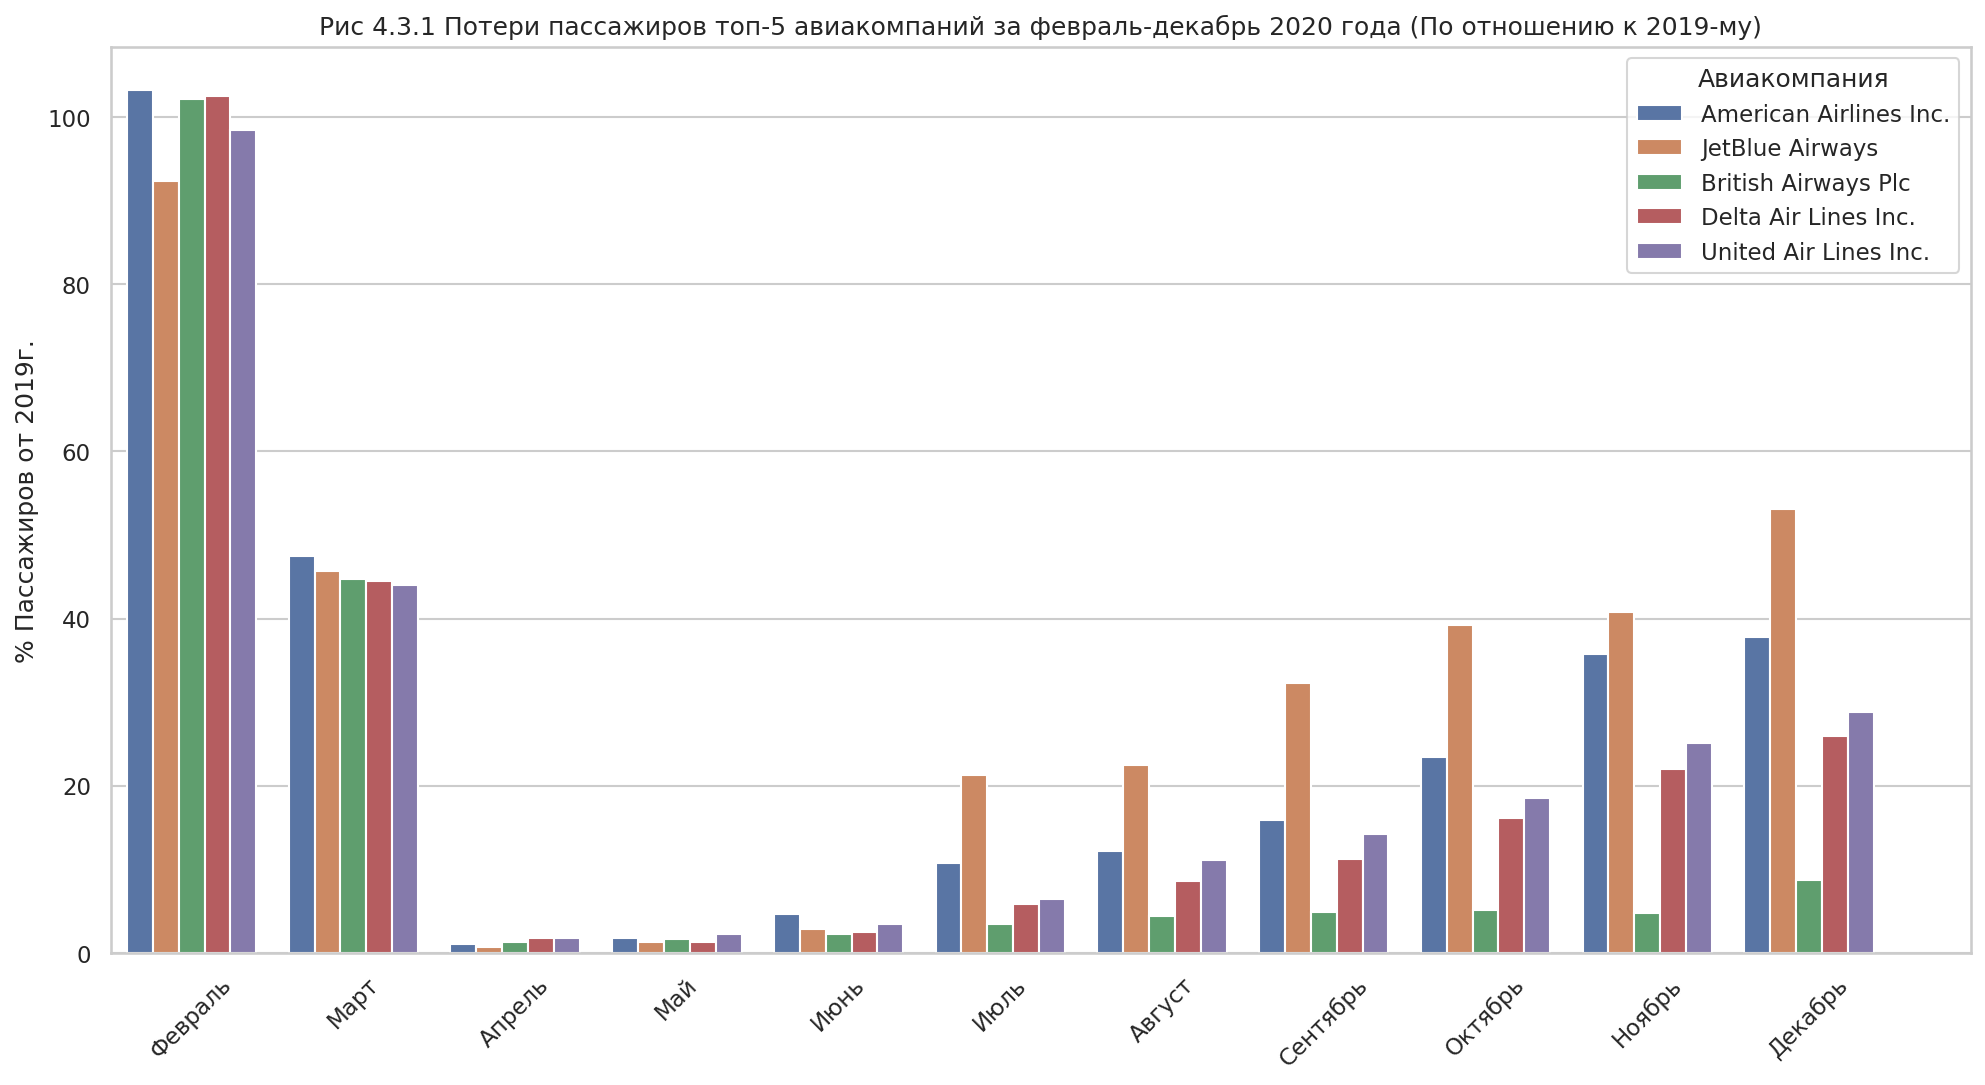

In [ ]:
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')
ax=sns.barplot(data=(df_top.loc[df_top['Year'] == 2020]), x='Month', y='%', hue='AirCraft')
plt.xticks(range(0,12), months[1:], rotation=45) #  зададим количество тиков явно, подкинем список месяцев, крутанём лейблы для красоты
plt.legend(title='Авиакомпания')
ax.set(ylabel="% Пассажиров от 2019г.")
ax.set(xlabel='')
ax.set(title='Рис 4.3.1 Потери пассажиров топ-5 авиакомпаний за февраль-декабрь 2020 года (По отношению к 2019-му)')
plt.show()

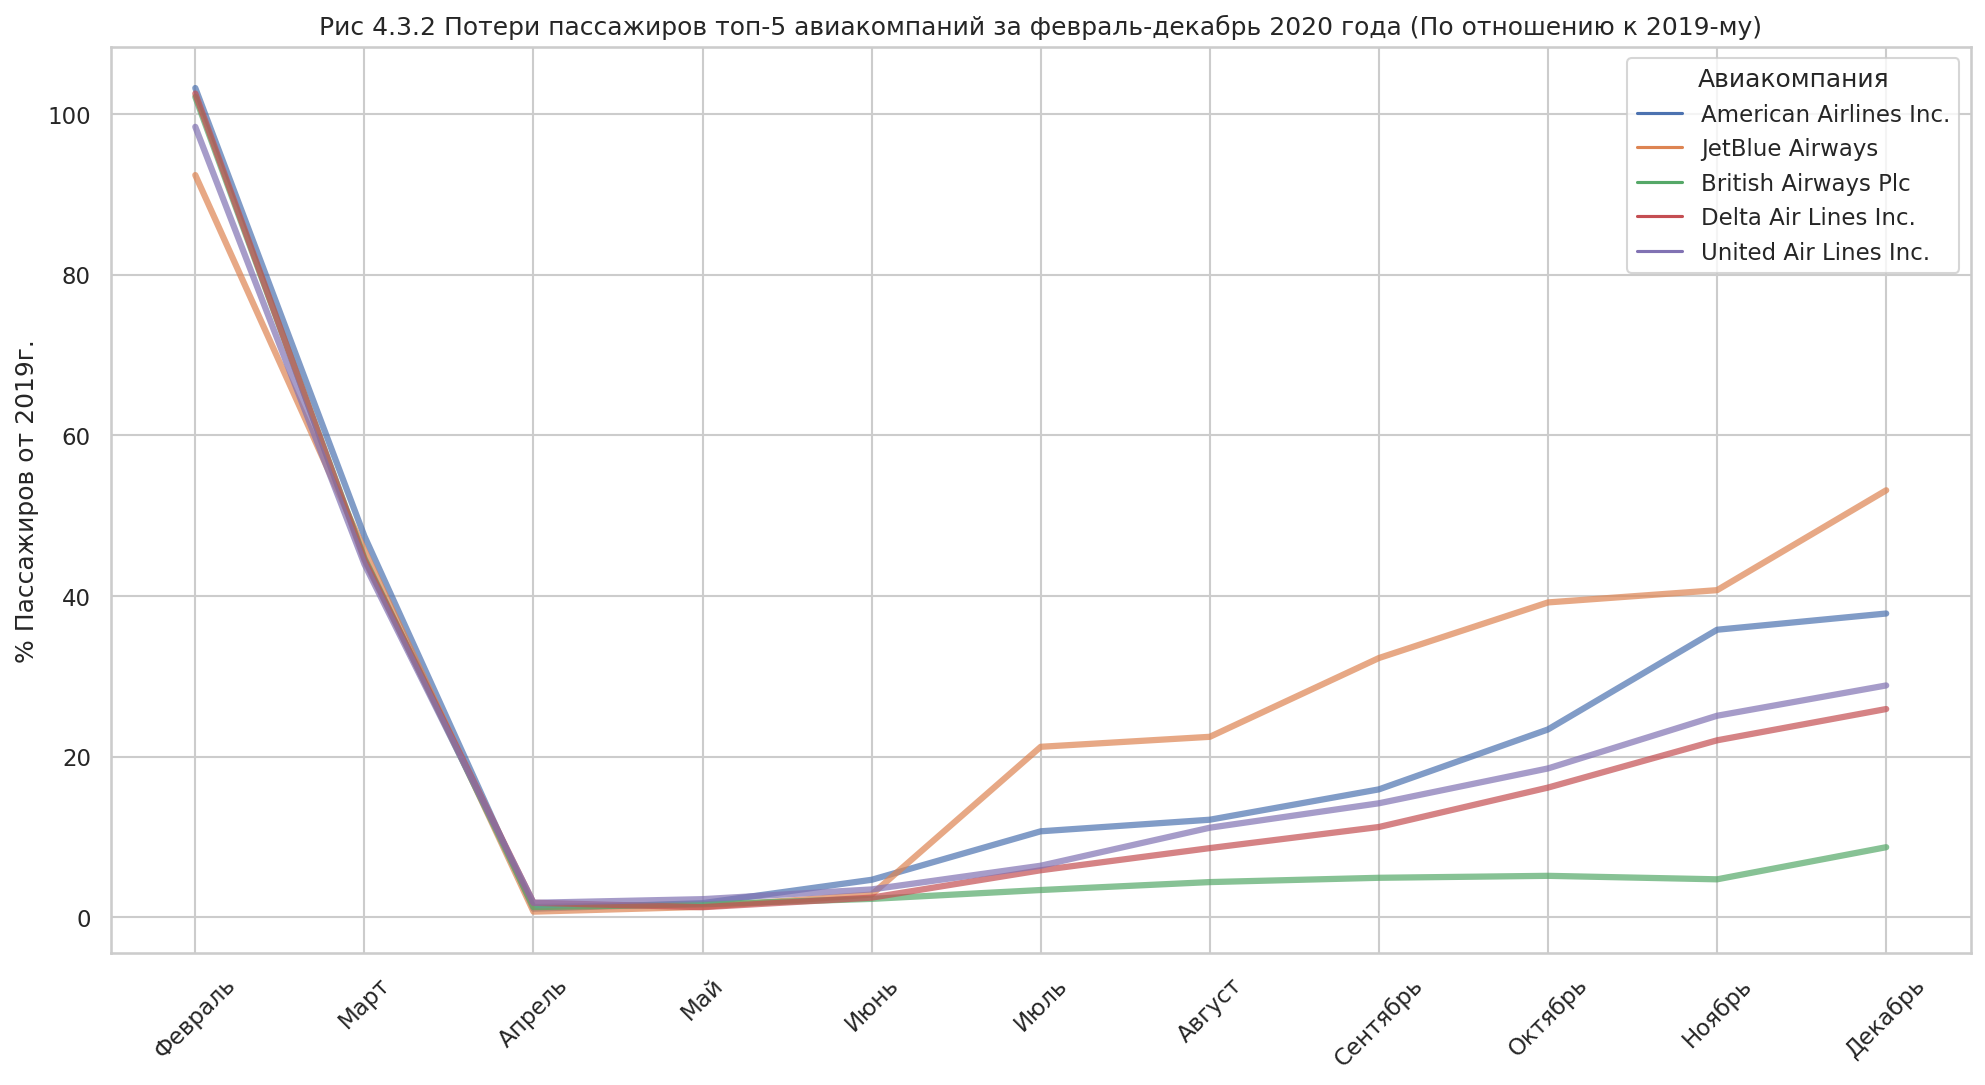

In [ ]:
plt.figure(figsize=[16,8], dpi=150)
ax = sns.lineplot(data=(df_top.loc[df_top['Year'] == 2020]), x='Month', y='%', hue='AirCraft', linewidth=3, alpha=0.7)
plt.xticks(range(2,13), months[1:], rotation=45) #  зададим количество тиков явно, подкинем список месяцев, крутанём лейблы для красоты
plt.legend(title='Авиакомпания')
ax.set(title='Рис 4.3.2 Потери пассажиров топ-5 авиакомпаний за февраль-декабрь 2020 года (По отношению к 2019-му)')
ax.set(ylabel="% Пассажиров от 2019г.")
ax.set(xlabel='')
plt.show()

Вопрос 4: Предположим, что по предварительным рассчетам (на июнь 2019 года) план по перелетам на февраль-декабрь 2020 года был такой же как на февраль-декабрь 2019 года. Если так, то какие фактические убытки понесли ТОП 5 **авиакомпаний**, если чистая прибыль за 1 человека в среднем = 15$.

Ответ:

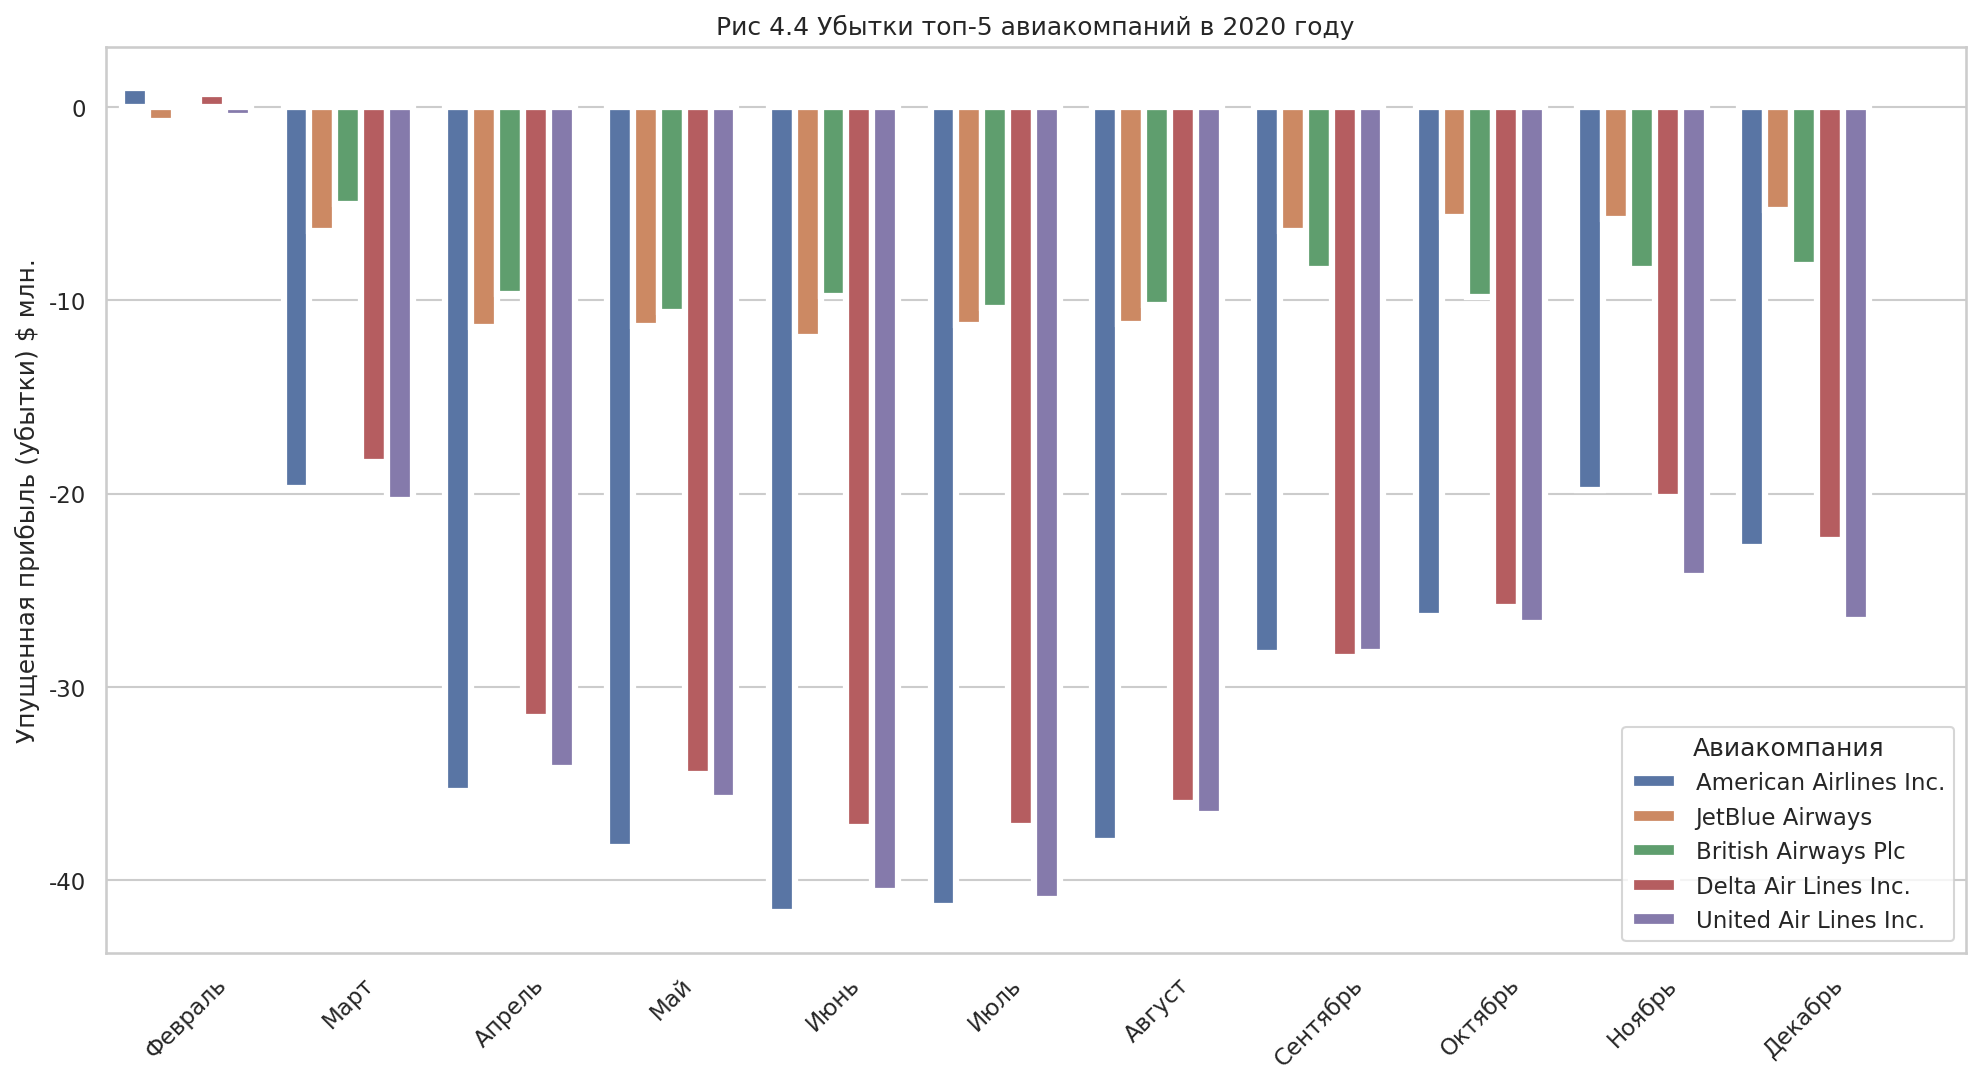

In [ ]:
loss_for_person = 15 #Прибыль с человека
df_top_loss = df_top.loc[df_top['Year'] == 2020].copy()

df_top_loss['loss'] = (df_top_loss['Total']- (100*df_top_loss['Total']/df_top_loss['%']))*loss_for_person

plt.figure(figsize=[16,8], dpi=150)
gx = sns.barplot(data=df_top_loss, x='Month', y='loss', hue='AirCraft', linewidth=3)
plt.xticks(range(0,12), months[1:], rotation=45)
ylabels = ['{:.0f}'.format(x) for x in gx.get_yticks()/1000000]
gx.set_yticklabels(ylabels)
plt.legend(title='Авиакомпания')
gx.set(ylabel='Упущенная прибыль (убытки) $ млн.')
gx.set(xlabel='')
gx.set(title='Рис 4.4 Убытки топ-5 авиакомпаний в 2020 году')
plt.show()

# Задание 5 (Дополнительно)
Здесь Вы можете поэксперементировать - провести собственный анализ, выдвинуть гипотезы относительно данных

In [ ]:
import plotly.express as px

In [ ]:
df_sept = df1.groupby(['Year','Month'])['Total'].sum().to_frame().reset_index()
df_sept = df_sept.loc[df_sept['Month']==9]

In [ ]:
fig = px.line(df_sept, x='Year', y='Total',width=960, height=540)
fig.show()
#  После жёсткого падения в 2001 из-за теракта, столько же пассажиров, как в 2000 получилось перевезти только через 5 лет, в 2006. 
#Потом есть небольшое падение в 2008-2009, думаю это кризис того времени ну и пандемия, тут всё ясно-понятно)

In [ ]:
# Подгрузим датасет с координатами аэропортов, код частично взял у Ивана.
iata_url = "https://datahub.io/core/airport-codes/r/airport-codes.csv"
iata = pd.read_csv(iata_url)
iata.rename(columns={"iata_code": "fg_apt"}, inplace=True) #  переименуем колонку для последующего слияния

In [ ]:
# Этот датасет содержит названия и коды стран в формате ISO-3
iso_country_url = 'https://datahub.io/core/country-list/r/data.csv'
iso_country = pd.read_csv(iso_country_url)
iso_country.rename(columns={"Code": "iso_country", 'Name':'Country'}, inplace=True)

In [ ]:
df_foreign = df1.groupby(by=['Year','Month','fg_apt'])['Total'].sum().to_frame().reset_index() #  Группируем по годам-месяцам-зарубежным шлюзам
df_foreign = df_foreign.merge(iata[['name', 'fg_apt','iso_country']], how='left', on='fg_apt') #  мёрджим по шлюзам
df_foreign = df_foreign.groupby(by=['Year','iso_country'])['Total'].sum().to_frame().reset_index() #  группировка год-страна
df_foreign = df_foreign.merge(iso_country, how='left', on='iso_country') #  мёрджа по коду страны, чтобы получить название страны
df_foreign

Year iso_country   Total                           Country
0     1990          AG  385785               Antigua and Barbuda
1     1990          AI    8790                          Anguilla
2     1990          AR  256133                         Argentina
3     1990          AT  123328                           Austria
4     1990          AU  902817                         Australia
...    ...         ...     ...                               ...
3680  2021          VC    4552  Saint Vincent and the Grenadines
3681  2021          VG    5383           Virgin Islands, British
3682  2021          VN      93                          Viet Nam
3683  2021          VU       2                           Vanuatu
3684  2021          WS      46                             Samoa

[3685 rows x 4 columns]

In [ ]:
# df_foreign.sort_values(['Year', 'Total'], ascending=[True,False]).groupby(['Year','Country']).apply(lambda x: x['Total'].nlargest(3).reset_index(drop=True)) #  мучения с мультииндексом
# df_foreign.sort_values(['Year', 'Total'], ascending=[True,False]).groupby(['Year', 'Country'], sort='False').apply(lambda x:x['Total'].nlargest(5)) #  ещё мучения
df_foreign = df_foreign.set_index(['Country']).groupby('Year')['Total'].nlargest(5).to_frame().reset_index() #  победа!
df_foreign = df_foreign.loc[df_foreign['Year'] <= 2020] #  21й год неинформативен
df_foreign

Year             Country     Total
0    1990              Canada  13351734
1    1990      United Kingdom  10434104
2    1990              Mexico   9648848
3    1990               Japan   9407615
4    1990             Germany   4964962
..    ...                 ...       ...
150  2020              Mexico  14063023
151  2020              Canada   7027306
152  2020      United Kingdom   3870890
153  2020  Dominican Republic   3284868
154  2020             Germany   2683875

[155 rows x 3 columns]

In [ ]:
df_foreign['Country'].unique() #  и в топе 5 у нас 6 стран, надо сказать, что Американцы за 30 лет не особо поменяли привычки.

array(['Canada', 'United Kingdom', 'Mexico', 'Japan', 'Germany',
       'Dominican Republic'], dtype=object)

In [ ]:
fig = px.scatter_geo(df_foreign, locations='Country', locationmode='country names', width=960, height=540, size='Total', color='Total', animation_frame='Year', color_continuous_scale=px.colors.cyclical.IceFire)
fig.show() # Могу заметить что полёты в Мексику практически догоняют полёты в Канаду к 2017г. а до этого времени Канада по популярности соперничает с Великобританией. в 2020 очень популярна Доминикана, им видимо плевать на ковид. А вот Япония максимально изолировалась